# Time Series and Forecasting 

In [306]:
# Import necessary libraries and modules
import itertools              
import numpy as np   
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt  
import warnings 
warnings.filterwarnings("ignore")  
plt.style.use('fivethirtyeight')

In [307]:
# Configure the appearance of the plots
matplotlib.rcParams['axes.labelsize'] = 14   # Set the label font size for plot axes
matplotlib.rcParams['xtick.labelsize'] = 12  # Set the font size for x-axis tick labels
matplotlib.rcParams['ytick.labelsize'] = 12  # Set the font size for y-axis tick labels
matplotlib.rcParams['text.color'] = 'k'     # Set the text color to black

## Exploratory Data Analysis

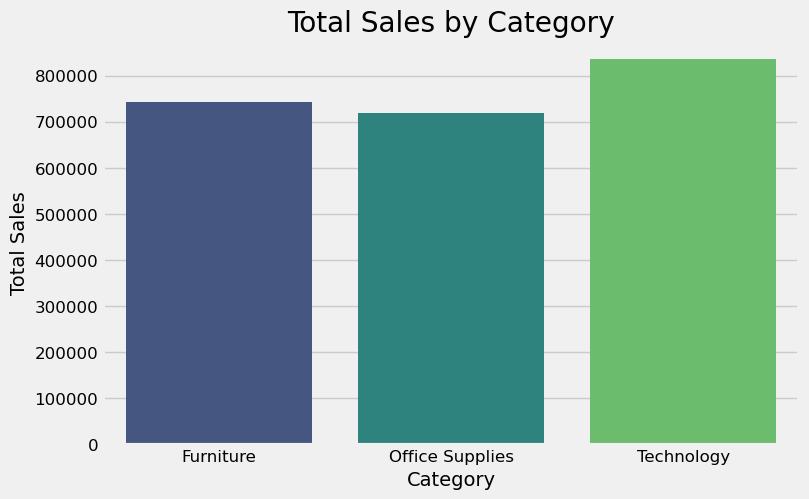

In [366]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("./Sample - Superstore.xls")

# Sales distribution by category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Sales', data=category_sales, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

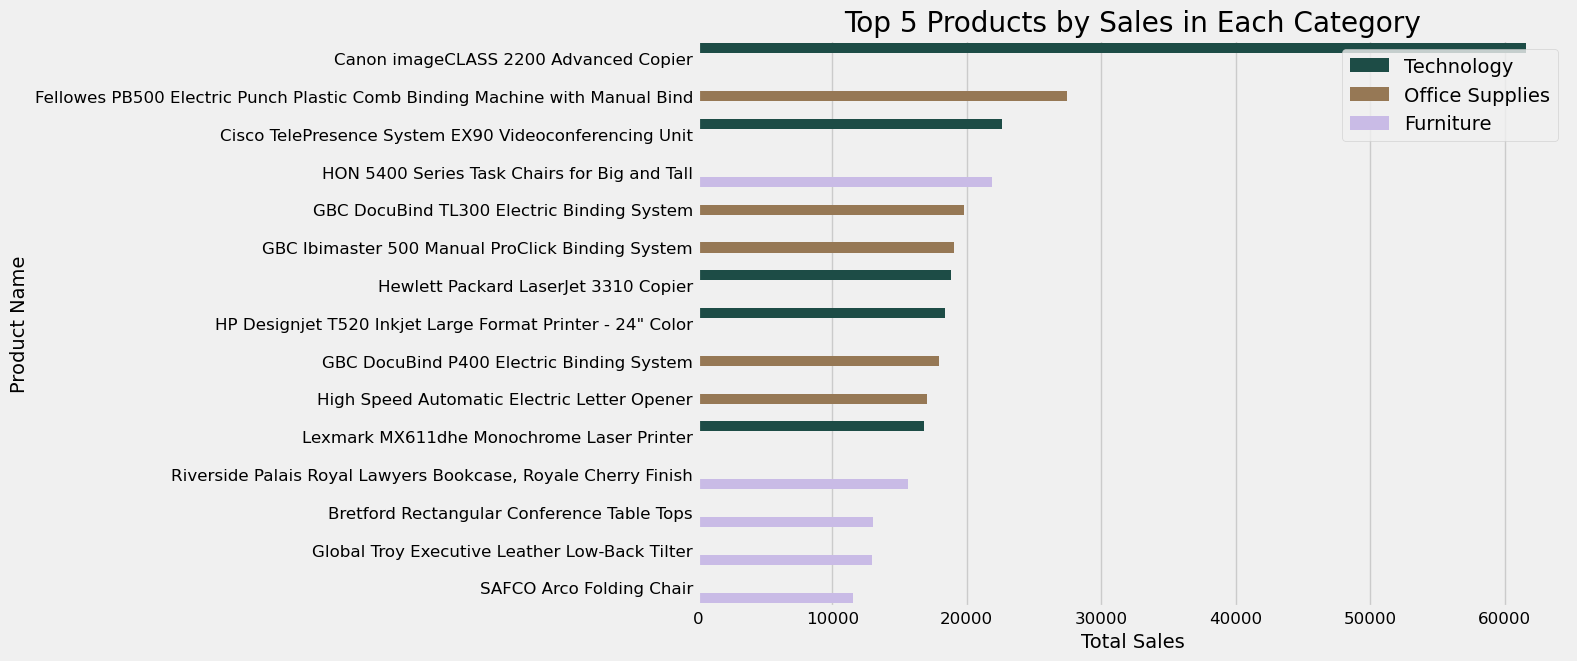

In [369]:
# Top 5 products by sales in each category
top_products = df.groupby(['Category', 'Product Name'])['Sales'].sum().reset_index()
top_products = top_products.sort_values(by='Sales', ascending=False).groupby('Category').head(5)

plt.figure(figsize=(10, 7))
sns.barplot(x='Sales', y='Product Name', hue='Category', data=top_products, palette='cubehelix')
plt.title('Top 5 Products by Sales in Each Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.legend(loc='upper right')
plt.show()

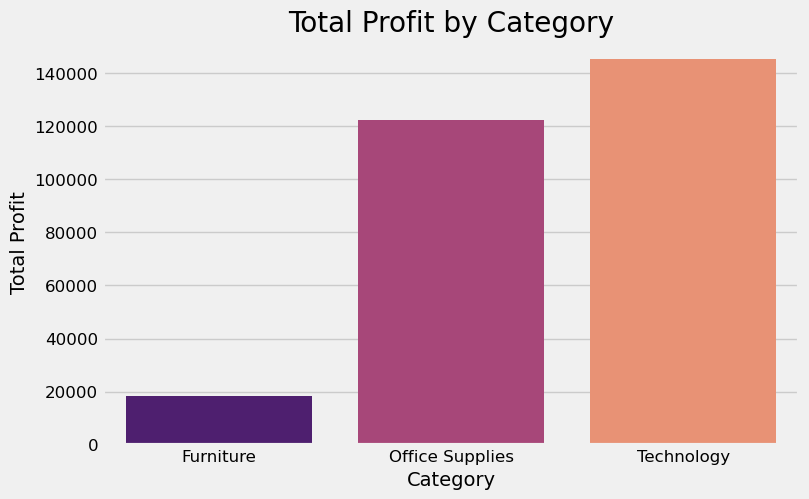

In [367]:
# Profit margins by category
category_profit = df.groupby('Category')['Profit'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Profit', data=category_profit, palette='magma')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()


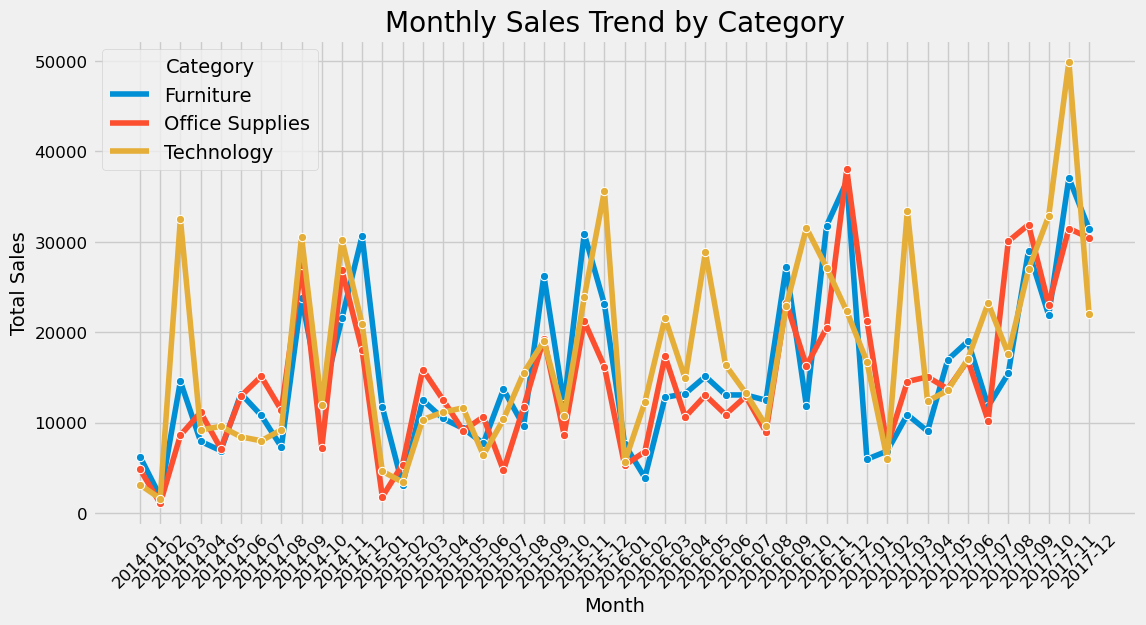

In [368]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract 'Month' as a string to avoid plotting issues
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)
# Group by 'Month' and 'Category' to calculate the sum of 'Sales'
monthly_sales = df.groupby(['Month', 'Category'])['Sales'].sum().reset_index()


# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Category', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend by Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [309]:
df

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9989    TB-21400  Tom Boeckenhauer   Consumer  United States            Miami   
9990    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9991    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9992    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9993    CC-12220      Chris Cortes   Consumer  United States      Westminster   

      ... Postal Code  Region       Product ID         Category Sub-Category  \
0     ...       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1     ...       42420   South  FUR-CH-10000454        Furniture       Chairs   
2     ...       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3     ...       33311   South  FUR-TA-10000577        Furniture       Tables   
4     ...       33311   South  OFF-ST-10000760  Office Supplies      Storage   
...   ...         ...     ...              ...              ...          ...   
9989  ...       33180   South  FUR-FU-10001889        Furniture  Furnishings   
9990  ...       92627    West  FUR-FU-10000747        Furniture  Furnishings   
9991  ...       92627    West  TEC-PH-10003645       Technology       Phones   
9992  ...       92627    West  OFF-PA-10004041  Office Supplies        Paper   
9993  ...       92683    West  OFF-AP-10002684  Office Supplies   Appliances   

                                           Product Name     Sales  Quantity  \
0                     Bush Somerset Collection Bookcase  261.9600         2   
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2     Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3         Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                        Eldon Fold 'N Roll Cart System   22.3680         2   
...                                                 ...       ...       ...   
9989                             Ultra Door Pull Handle   25.2480         3   
9990  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.9600         2   
9991                              Aastra 57i VoIP phone  258.5760         2   
9992  It's Hot Message Books with Stickers, 2 3/4" x 5"   29.6000         4   
9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20   19.3932  
9992      0.

## Seasonal Decomposition

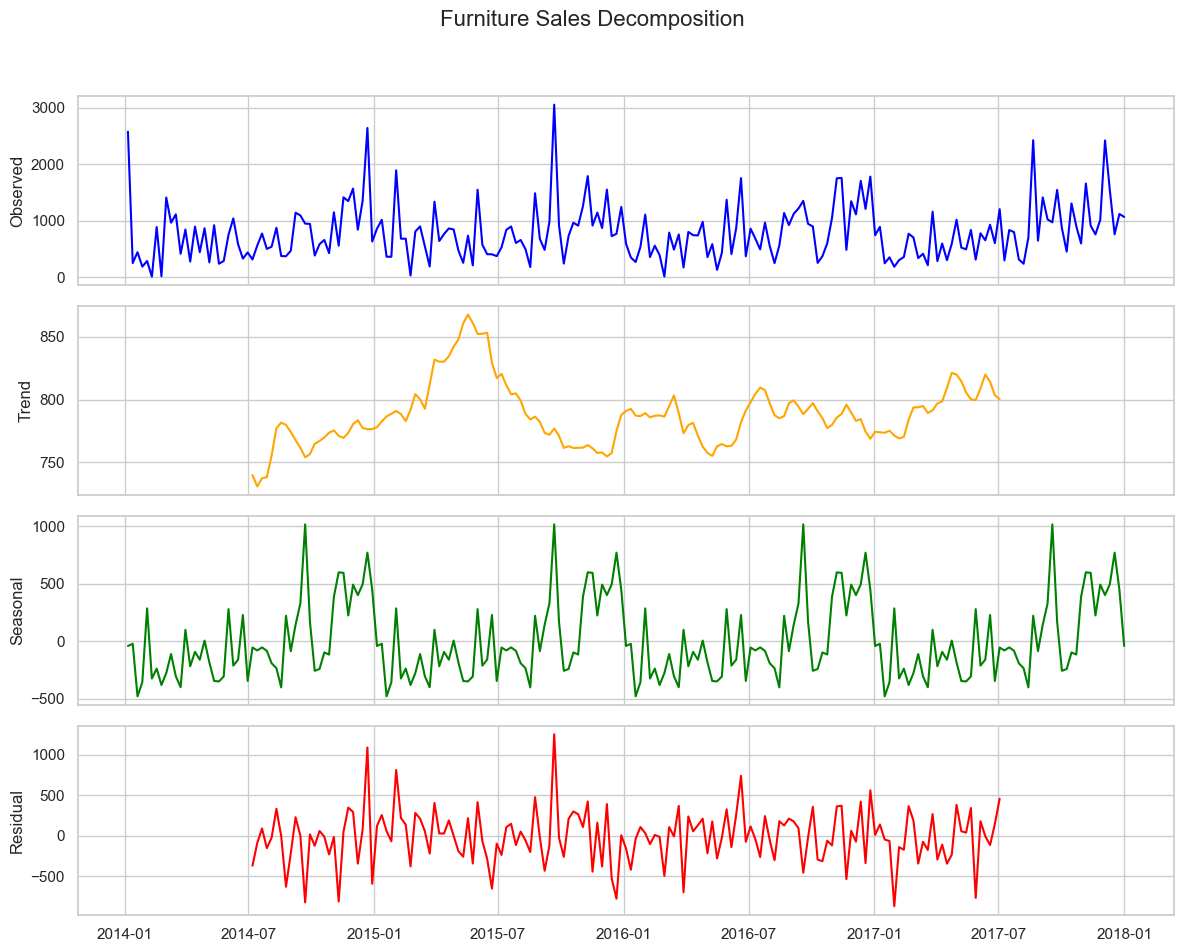

In [374]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Data Preparation (Same as Before)
furniture = df.loc[df['Category'] == 'Furniture']
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture = furniture.set_index('Order Date')
y_furniture = furniture['Sales'].resample('W-MON').mean().fillna(method='ffill')

office_supplies = df.loc[df['Category'] == 'Office Supplies']
office_supplies = office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies['Order Date'] = pd.to_datetime(office_supplies['Order Date'])
office_supplies = office_supplies.set_index('Order Date')
y_office_supplies = office_supplies['Sales'].resample('W-MON').mean().fillna(method='ffill')

technology = df.loc[df['Category'] == 'Technology']
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
technology['Order Date'] = pd.to_datetime(technology['Order Date'])
technology = technology.set_index('Order Date')
y_technology = technology['Sales'].resample('W-MON').mean().fillna(method='ffill')

# Seasonal Decomposition
furniture_decomp = seasonal_decompose(y_furniture, model='additive', period=52)
office_supplies_decomp = seasonal_decompose(y_office_supplies, model='additive', period=52)
technology_decomp = seasonal_decompose(y_technology, model='additive', period=52)

# Plotting Function
def plot_decomposition(decomp_result, title):
    fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
    fig.suptitle(title, fontsize=16)

    # Observed
    axes[0].plot(decomp_result.observed, color='blue')
    axes[0].set_ylabel('Observed')
    axes[0].grid(True)

    # Trend
    axes[1].plot(decomp_result.trend, color='orange')
    axes[1].set_ylabel('Trend')
    axes[1].grid(True)

    # Seasonal
    axes[2].plot(decomp_result.seasonal, color='green')
    axes[2].set_ylabel('Seasonal')
    axes[2].grid(True)

    # Residual
    axes[3].plot(decomp_result.resid, color='red')
    axes[3].set_ylabel('Residual')
    axes[3].grid(True)

    # Final touches
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plotting Decomposition for each Category
plot_decomposition(furniture_decomp, 'Furniture Sales Decomposition')

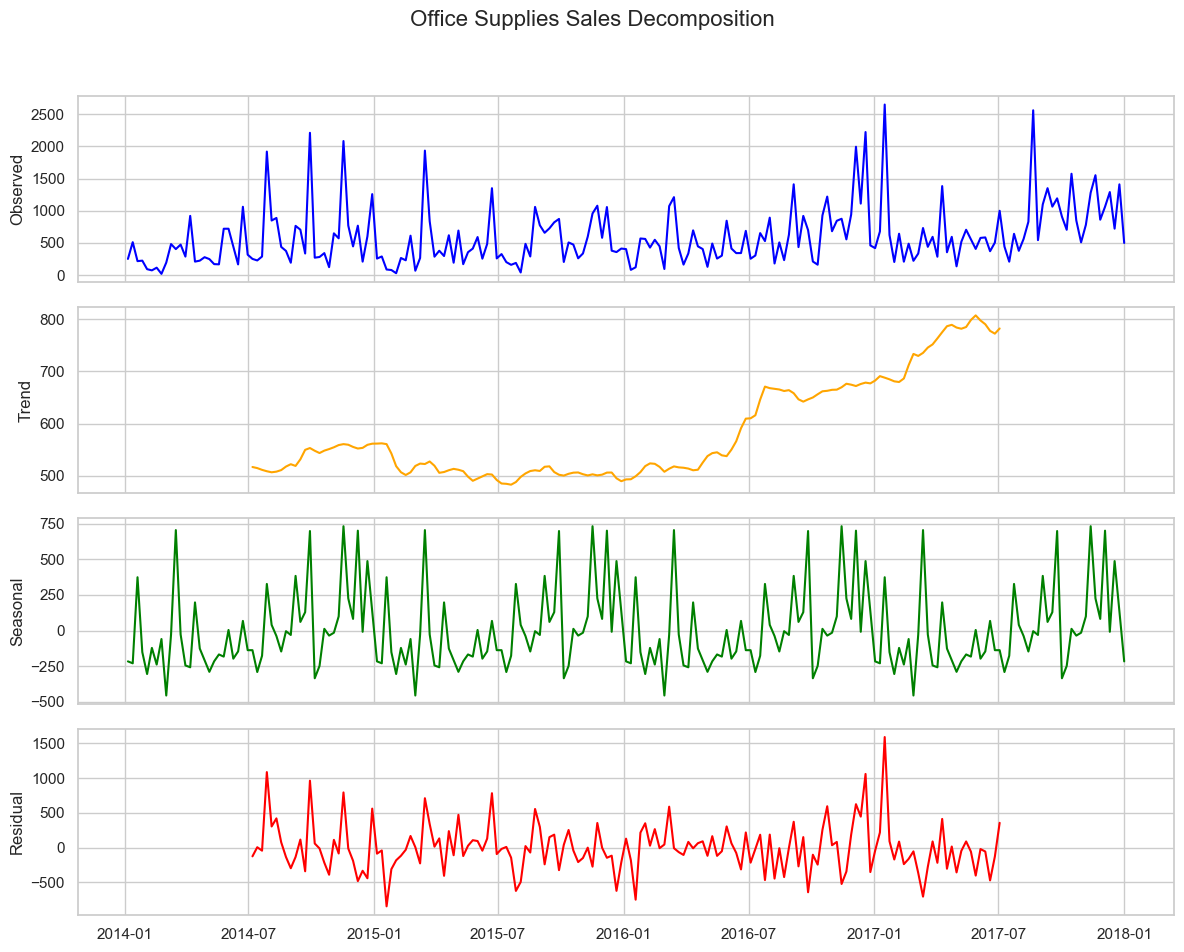

In [375]:
plot_decomposition(office_supplies_decomp, 'Office Supplies Sales Decomposition')

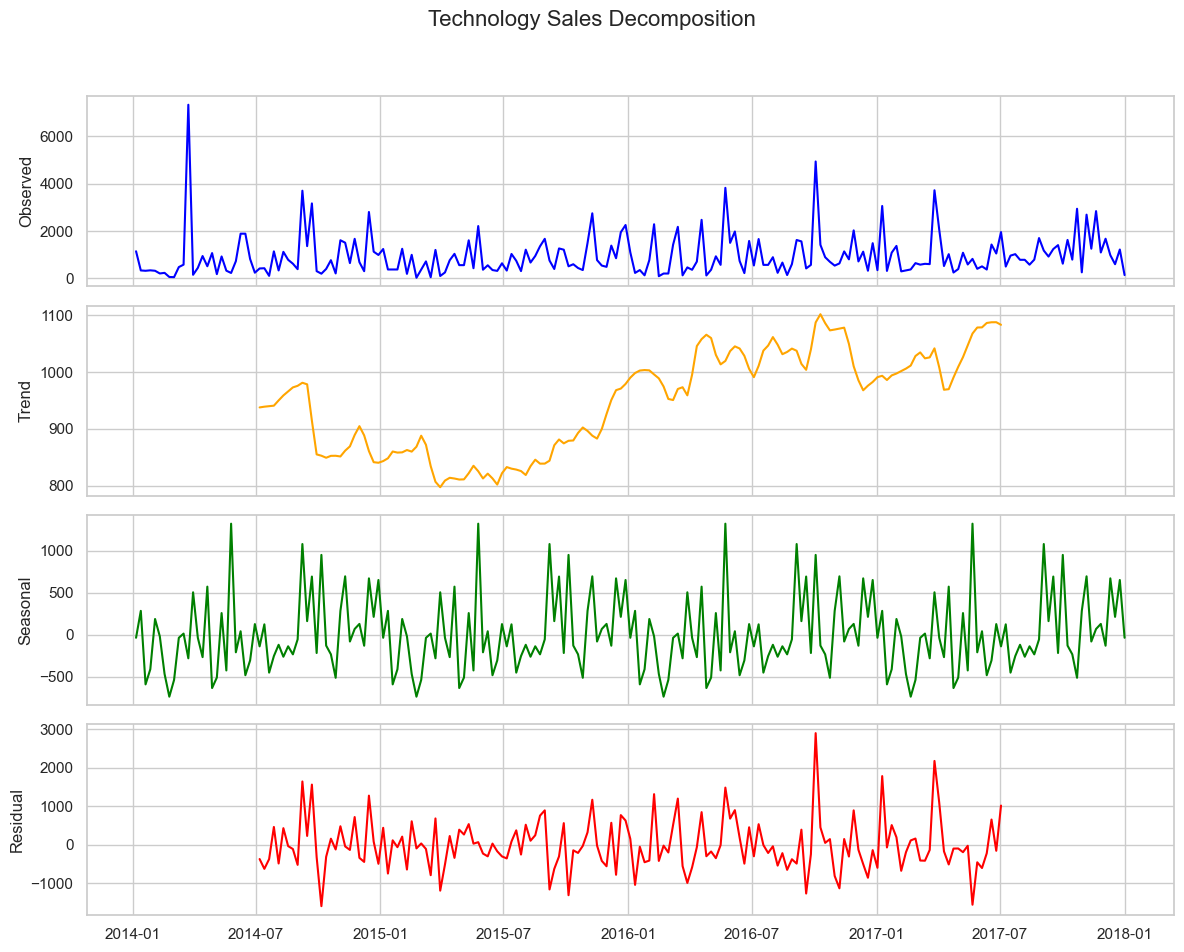

In [376]:
plot_decomposition(technology_decomp, 'Technology Sales Decomposition')

### Furniture - SARIMA Model

In [310]:
# Filter the data to select rows where the 'Category' column is 'Furniture'
furniture = df.loc[df['Category'] == 'Furniture']
furniture

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
5          6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
10        11  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
...      ...             ...        ...        ...             ...   
9962    9963  CA-2015-168088 2015-03-19 2015-03-22     First Class   
9964    9965  CA-2016-146374 2016-12-05 2016-12-10    Second Class   
9980    9981  US-2015-151435 2015-09-06 2015-09-09    Second Class   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   

     Customer ID     Customer Name      Segment        Country  \
0       CG-12520       Claire Gute     Consumer  United States   
1       CG-12520       Claire Gute     Consumer  United States   
3       SO-20335    Sean O'Donnell     Consumer  United States   
5       BH-11710   Brosina Hoffman     Consumer  United States   
10      BH-11710   Brosina Hoffman     Consumer  United States   
...          ...               ...          ...            ...   
9962    CM-12655  Corinna Mitchell  Home Office  United States   
9964    HE-14800      Harold Engle    Corporate  United States   
9980    SW-20455       Shaun Weien     Consumer  United States   
9989    TB-21400  Tom Boeckenhauer     Consumer  United States   
9990    DB-13060       Dave Brooks     Consumer  United States   

                 City  ... Postal Code   Region       Product ID   Category  \
0           Henderson  ...       42420    South  FUR-BO-10001798  Furniture   
1           Henderson  ...       42420    South  FUR-CH-10000454  Furniture   
3     Fort Lauderdale  ...       33311    South  FUR-TA-10000577  Furniture   
5         Los Angeles  ...       90032     West  FUR-FU-10001487  Furniture   
10        Los Angeles  ...       90032     West  FUR-TA-10001539  Furniture   
...               ...  ...         ...      ...              ...        ...   
9962          Houston  ...       77041  Central  FUR-BO-10004218  Furniture   
9964           Newark  ...       19711     East  FUR-FU-10002671  Furniture   
9980        Lafayette  ...       70506    South  FUR-TA-10001039  Furniture   
9989            Miami  ...       33180    South  FUR-FU-10001889  Furniture   
9990       Costa Mesa  ...       92627     West  FUR-FU-10000747  Furniture   

     Sub-Category                                       Product Name  \
0       Bookcases                  Bush Somerset Collection Bookcase   
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
3          Tables      Bretford CR4500 Series Slim Rectangular Table   
5     Furnishings  Eldon Expressions Wood and Plastic Desk Access...   
10         Tables           Chromcraft Rectangular Conference Tables   
...           ...                                                ...   
9962    Bookcases  Bush Heritage Pine Collection 5-Shelf Bookcase...   
9964  Furnishings  Electrix 20W Halogen Replacement Bulb for Zoom...   
9980       Tables                         KI Adjustable-Height Table   
9989  Furnishings                             Ultra Door Pull Handle   
9990  Furnishings  Tenex B1-RE Series Chair Mats for Low Pile Car...   

          Sales  Quantity  Discount    Profit  
0      261.9600         2      0.00   41.9136  
1      731.9400         3      0.00  219.5820  
3      957.5775         5      0.45 -383.0310  
5       48.8600         7      0.00   14.1694  
10    1706.1840         9      0.20   85.3092  
...         ...       ...       ...       ...  
9962   383.4656         4      0.32  -67.6704  
9964    13.4000         1      0.00    6.4320  
9980    85.9800         1      0.00   22.3548  
9989    25.2480         3      0.20    4.1028  
9990    91.9600         2     

In [311]:
# Convert the 'Order Date' column in the 'furniture' DataFrame to datetime format
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])

In [312]:
# Define a list of column names to be dropped from the 'furniture' DataFrame
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',  'City',  'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

# Drop the specified columns from the 'furniture' DataFrame
furniture.drop(cols, axis=1, inplace=True)

# Sort the 'furniture' DataFrame based on the 'Order Date' column
furniture = furniture.sort_values('Order Date')

# Check for missing values (null values) in the DataFrame and display the count of missing values per column
furniture.isnull().sum()

Order Date    0
Country       0
State         0
Sales         0
dtype: int64

In [313]:
# Group the 'furniture' DataFrame by 'Order Date' and calculate the sum of 'Sales' for each date
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [314]:
# Set the 'Order Date' column as the index of the 'furniture' DataFrame
furniture = furniture.set_index('Order Date')

In [315]:
# Convert the index to datetime if it's not already
furniture.index = pd.to_datetime(furniture.index)

# Resample by month start ('MS-MON') and calculate the mean
y = furniture['Sales'].resample('W-MON').mean()

In [318]:
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Example for Furniture Sales (you can repeat this for other categories like Office Supplies and Technology)

# Resample the 'Sales' data to weekly ('W-MON') frequency, calculating the mean for each week
y_furniture = furniture['Sales'].resample('W-MON').mean()

# Train-Test Split (80/20)
train_size = int(len(y_furniture) * 0.8)
train, test = y_furniture[:train_size], y_furniture[train_size:]

# Define the p, d, q parameters for ARIMA model
p = d = q = range(0, 2)

# Generate all combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Generate all combinations of seasonal p, d, q with a seasonal period of 12 (for monthly seasonality)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Initialize variables to store the best model parameters
best_aic = float('inf')
best_params_furniture = None
best_seasonal_params_furniture = None

# Find the best ARIMA model on the training data
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_params_furniture = param
                best_seasonal_params_furniture = param_seasonal
        except:
            continue

print(f'Best SARIMA model for Furniture: ARIMA{best_params_furniture}x{best_seasonal_params_furniture}12 - AIC:{best_aic}')


# Fit the best ARIMA model on the training data
mod = sm.tsa.statespace.SARIMAX(train,
                                order=best_param,
                                seasonal_order=best_seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(disp=False)

print(results.summary().tables[1])

Best SARIMA model for Furniture: ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2127.273220517218
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8213      0.057    -14.507      0.000      -0.932      -0.710
ma.S.L12      -0.9853      0.673     -1.465      0.143      -2.304       0.333
sigma2      2.399e+05   1.52e+05      1.577      0.115   -5.82e+04    5.38e+05


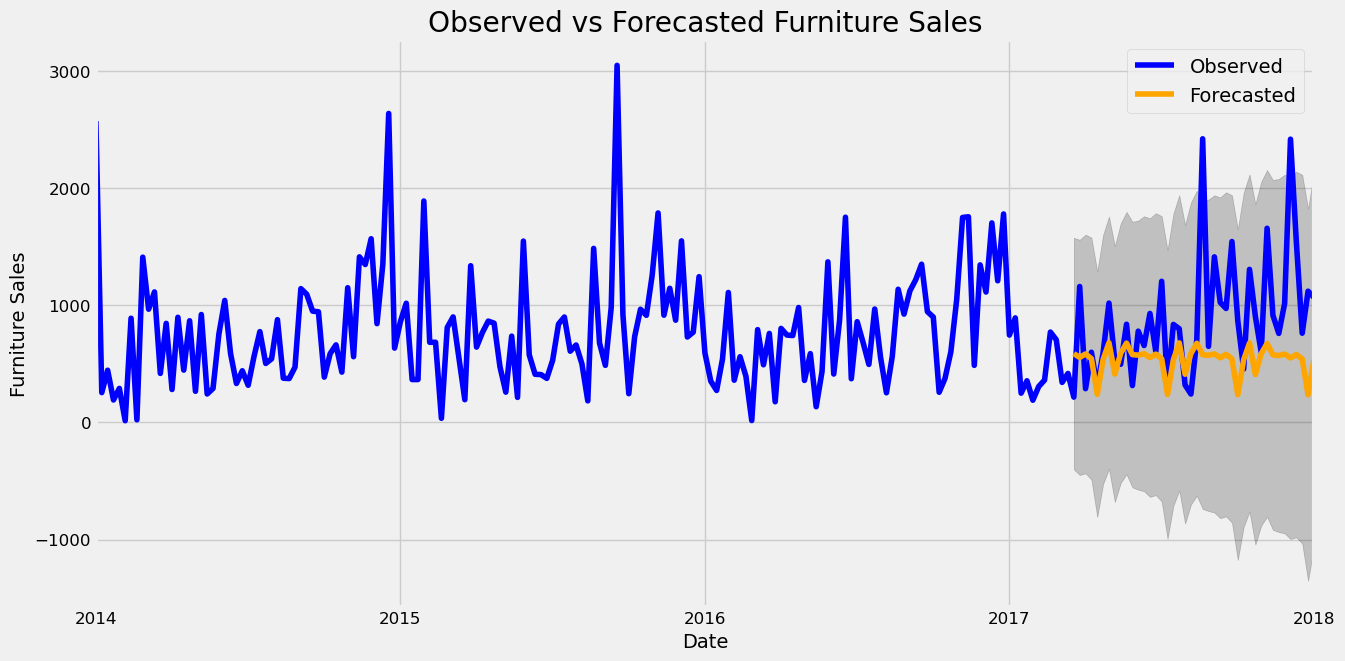

The Mean Squared Error of our forecasts is 358740.23


In [319]:
pred = results.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)
pred_ci = pred.conf_int()

# Plot the observed and forecasted values
plt.figure(figsize=(14, 7))
ax = y.plot(label='Observed', color='blue')
pred.predicted_mean.plot(ax=ax, label='Forecasted', color='orange')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.title('Observed vs Forecasted Furniture Sales')
plt.show()

# Calculate the Mean Squared Error
y_forecasted = pred.predicted_mean
mse = mean_squared_error(test, y_forecasted)
print(f'The Mean Squared Error of our forecasts is {round(mse, 2)}')

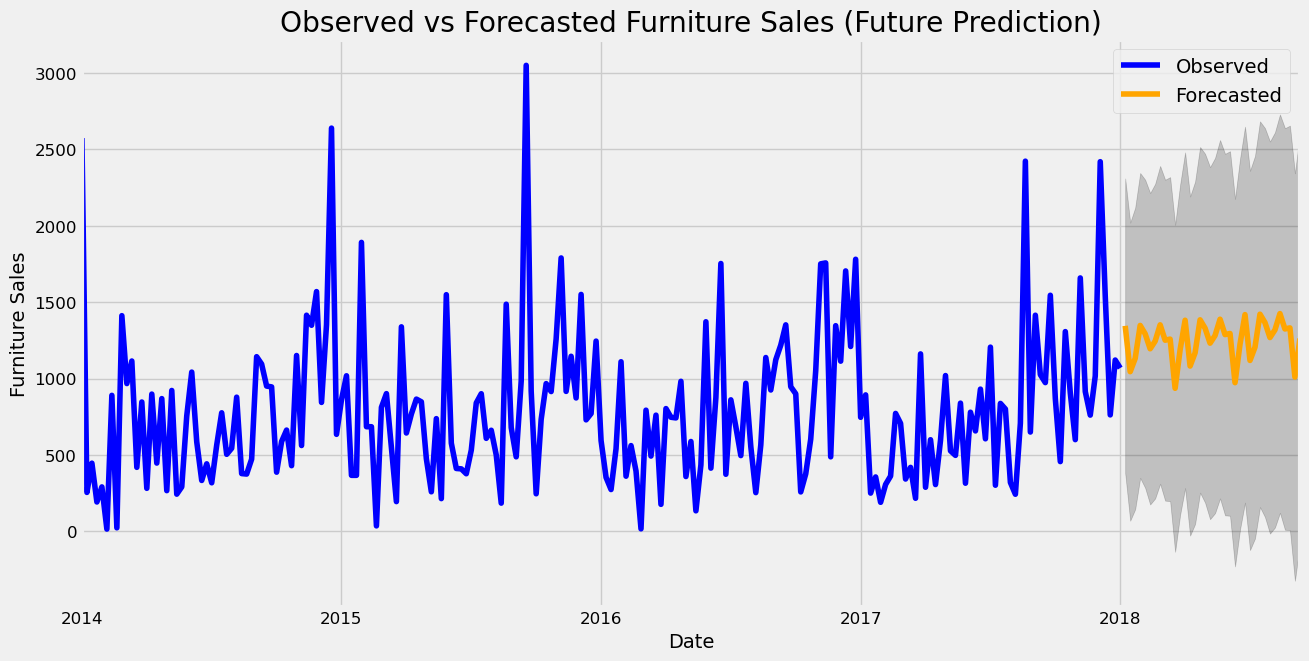

2018-01-08    1344.796586
2018-01-15    1044.844082
2018-01-22    1131.609892
2018-01-29    1347.448366
2018-02-05    1292.585109
2018-02-12    1194.656409
2018-02-19    1244.774895
2018-02-26    1351.359169
2018-03-05    1250.887320
2018-03-12    1257.964490
2018-03-19     935.952823
2018-03-26    1188.201434
2018-04-02    1381.571393
2018-04-09    1081.618889
2018-04-16    1168.384699
2018-04-23    1384.223173
2018-04-30    1329.359916
2018-05-07    1231.431216
2018-05-14    1281.549702
2018-05-21    1388.133976
2018-05-28    1287.662127
2018-06-04    1294.739297
2018-06-11     972.727630
2018-06-18    1224.976241
2018-06-25    1418.346200
2018-07-02    1118.393696
2018-07-09    1205.159506
2018-07-16    1420.997980
2018-07-23    1366.134723
2018-07-30    1268.206023
2018-08-06    1318.324509
2018-08-13    1424.908783
2018-08-20    1324.436934
2018-08-27    1331.514104
2018-09-03    1009.502437
2018-09-10    1261.751048
Freq: W-MON, Name: predicted_mean, dtype: float64


In [320]:
# Fit the best ARIMA model on the entire dataset
mod = sm.tsa.statespace.SARIMAX(y,
                                order=best_param,
                                seasonal_order=best_seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(disp=False)

# Forecast future values
future_steps = 36  # Predict the next 36 weeks
future_forecast = results.get_forecast(steps=future_steps)

# Get the predicted mean and confidence intervals
future_pred = future_forecast.predicted_mean
future_ci = future_forecast.conf_int()

# Plot observed and forecasted values
plt.figure(figsize=(14, 7))

# Plot the historical data
ax = y.plot(label='Observed', color='blue')

# Plot the forecasted future values
future_pred.plot(ax=ax, label='Forecasted', color='orange')

# Fill the area between the confidence intervals
ax.fill_between(future_ci.index,
                future_ci.iloc[:, 0],
                future_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.title('Observed vs Forecasted Furniture Sales (Future Prediction)')
plt.show()

# Print the forecasted values
print(future_pred)


### Furniture - Prophet Model

19:49:21 - cmdstanpy - INFO - Chain [1] start processing
19:49:21 - cmdstanpy - INFO - Chain [1] done processing


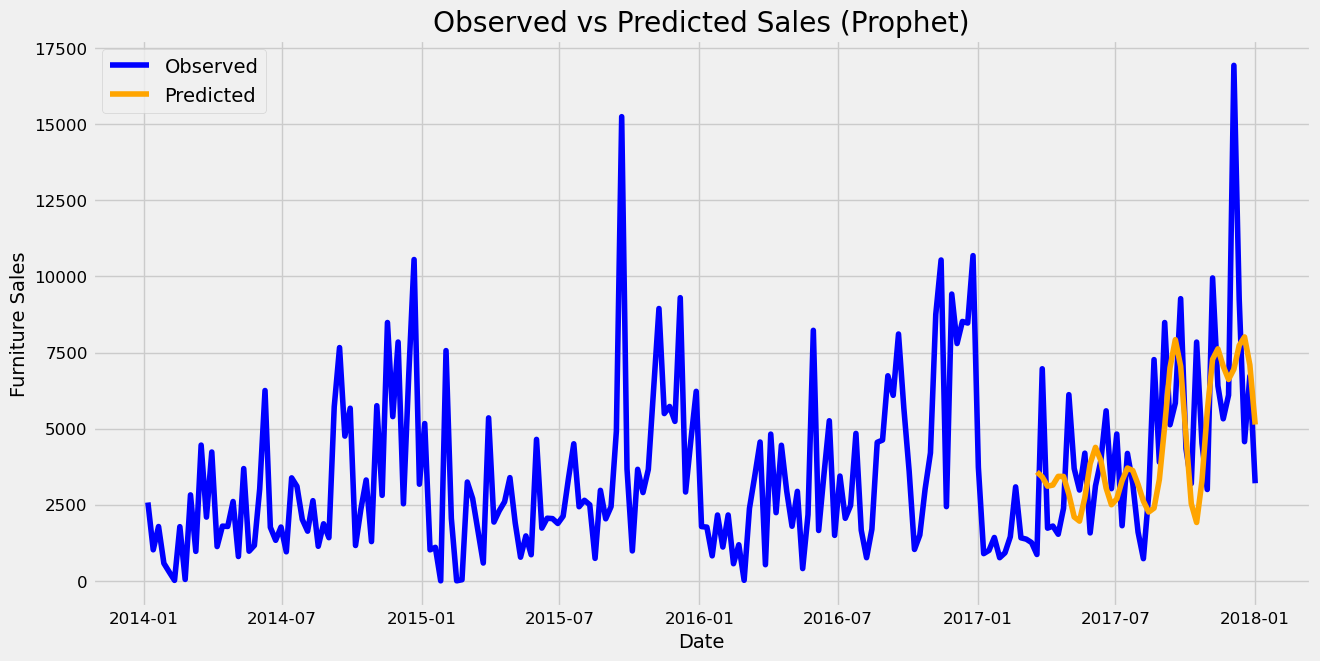

Test RMSE: 2644.49


<Figure size 1400x700 with 0 Axes>

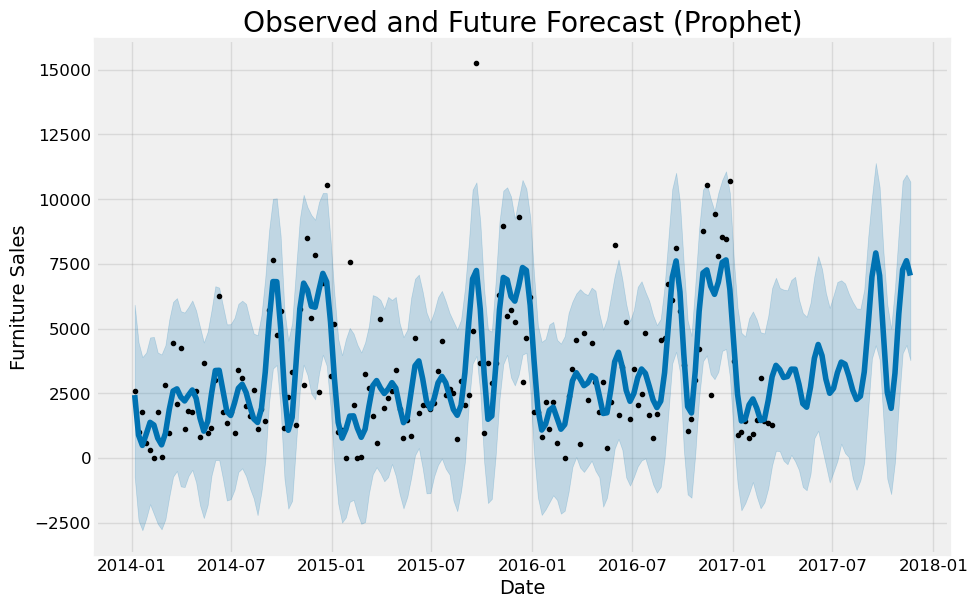

            ds         yhat   yhat_lower    yhat_upper
167 2017-03-20  3578.211810   279.394304   6963.807880
168 2017-03-27  3411.907693   263.184448   6570.990480
169 2017-04-03  3109.682137  -106.998205   6503.850114
170 2017-04-10  3146.227749  -242.922784   6479.451035
171 2017-04-17  3431.680089   121.187567   6877.611184
172 2017-04-24  3428.779933  -129.242049   6999.338560
173 2017-05-01  2845.731593  -470.069431   6123.867729
174 2017-05-08  2098.715212 -1120.076926   5602.884628
175 2017-05-15  1960.426785 -1249.212838   5455.431038
176 2017-05-22  2731.432244  -619.072968   5996.381760
177 2017-05-29  3846.862768   763.192083   7021.869666
178 2017-06-05  4384.226709  1051.723783   7801.180194
179 2017-06-12  3955.004636   384.927843   7301.784901
180 2017-06-19  3047.812577  -275.400548   6385.146337
181 2017-06-26  2498.684072  -947.524595   5800.226589
182 2017-07-03  2689.514983  -539.414497   6284.643959
183 2017-07-10  3291.457302  -116.707250   6801.325602
184 2017-0

In [321]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for Prophet
furniture = furniture.reset_index()
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Resample to weekly frequency
furniture['ds'] = pd.to_datetime(furniture['ds'])
furniture = furniture.resample('W-MON', on='ds').sum().reset_index()

# Train-Test Split (80/20)
train_size = int(len(furniture) * 0.8)
train = furniture[:train_size]
test = furniture[train_size:]

# Initialize the Prophet model
prophet_model = Prophet(interval_width=0.95)

# Fit the model on the training data
prophet_model.fit(train)

# Make future dataframe including the test period
future = prophet_model.make_future_dataframe(periods=len(test), freq='W-MON')

# Predict on the future dataframe (including test period)
forecast = prophet_model.predict(future)

# Extract the predictions for the test set
test_forecast = forecast[-len(test):]

# Plot observed vs predicted
plt.figure(figsize=(14, 7))

# Plot observed data
plt.plot(furniture['ds'], furniture['y'], label='Observed', color='blue')

# Plot predictions on the test set
plt.plot(test['ds'], test_forecast['yhat'], label='Predicted', color='orange')

plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.title('Observed vs Predicted Sales (Prophet)')
plt.legend()
plt.show()

# Calculate RMSE for the test set
rmse = np.sqrt(mean_squared_error(test['y'], test_forecast['yhat']))
print(f'Test RMSE: {rmse:.2f}')

# Future Prediction
# Let's predict for the next 36 weeks
future_forecast_period = prophet_model.make_future_dataframe(periods=36, freq='W-MON')
future_forecast = prophet_model.predict(future_forecast_period)

# Plot future forecast
plt.figure(figsize=(14, 7))

# Plot entire data with forecast
prophet_model.plot(future_forecast, xlabel='Date', ylabel='Furniture Sales')
plt.title('Observed and Future Forecast (Prophet)')
plt.show()

# Print future forecast
print(future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(36))


### Furniture - LSTM Model

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0547
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0243 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0195 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0239 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0223 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0245 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0217 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0251 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0226 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0237 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0231 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0188 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0186 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0203 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0185 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━

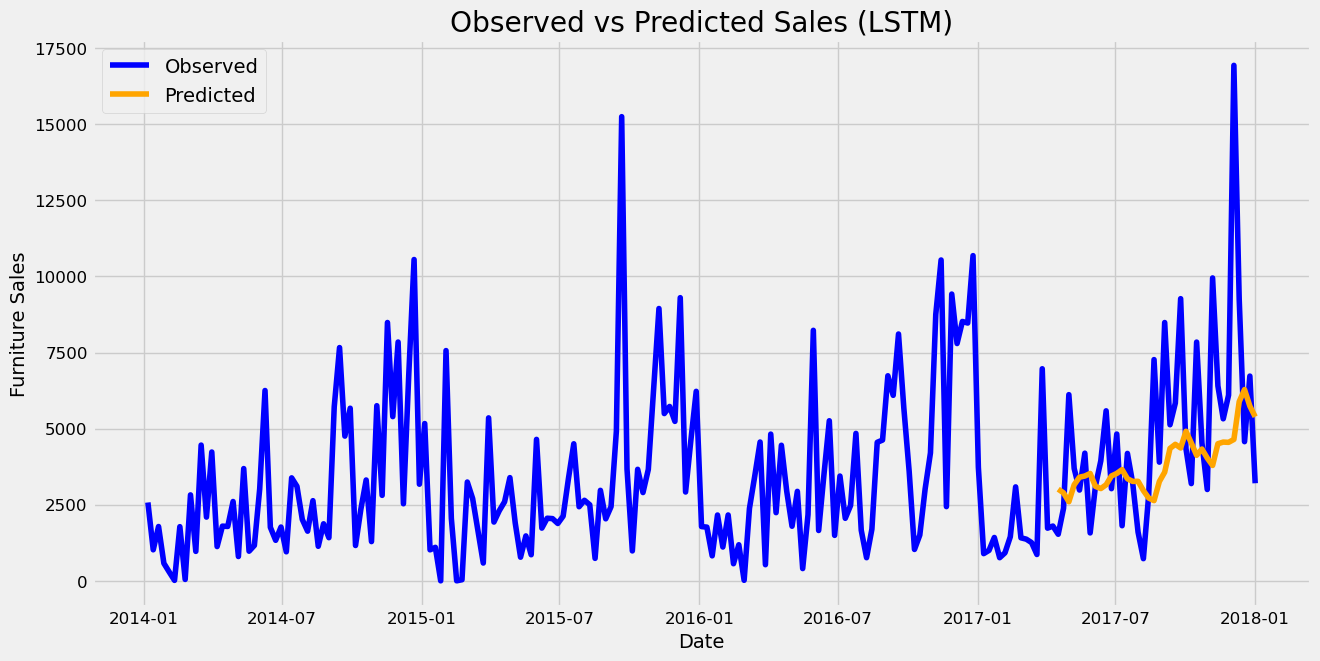

In [322]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Resample the data to weekly frequency
furniture = df.loc[df['Category'] == 'Furniture']
# Define a list of column names to be dropped from the 'furniture' DataFrame
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',  'City',  'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

# Drop the specified columns from the 'furniture' DataFrame
furniture.drop(cols, axis=1, inplace=True)

# Sort the 'furniture' DataFrame based on the 'Order Date' column
furniture = furniture.sort_values('Order Date')

# Check for missing values (null values) in the DataFrame and display the count of missing values per column
furniture.isnull().sum()
furniture = furniture.reset_index()
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture = furniture.resample('W-MON', on='Order Date').sum().reset_index()

# Prepare data for LSTM
data = furniture[['Order Date', 'Sales']]
data = data.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['y']])

# Train-Test Split (80/20)
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=4):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1 with a look_back window
look_back = 4
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], look_back, 1))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

# Calculate RMSE for the test set
rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))
print(f'Test RMSE: {rmse:.2f}')

# Plot observed vs predicted for test set
plt.figure(figsize=(14, 7))
plt.plot(data['ds'], data['y'], label='Observed', color='blue')
plt.plot(data['ds'][train_size+look_back:train_size+look_back+len(test_predict)], test_predict, label='Predicted', color='orange')
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.title('Observed vs Predicted Sales (LSTM)')
plt.legend()
plt.show()

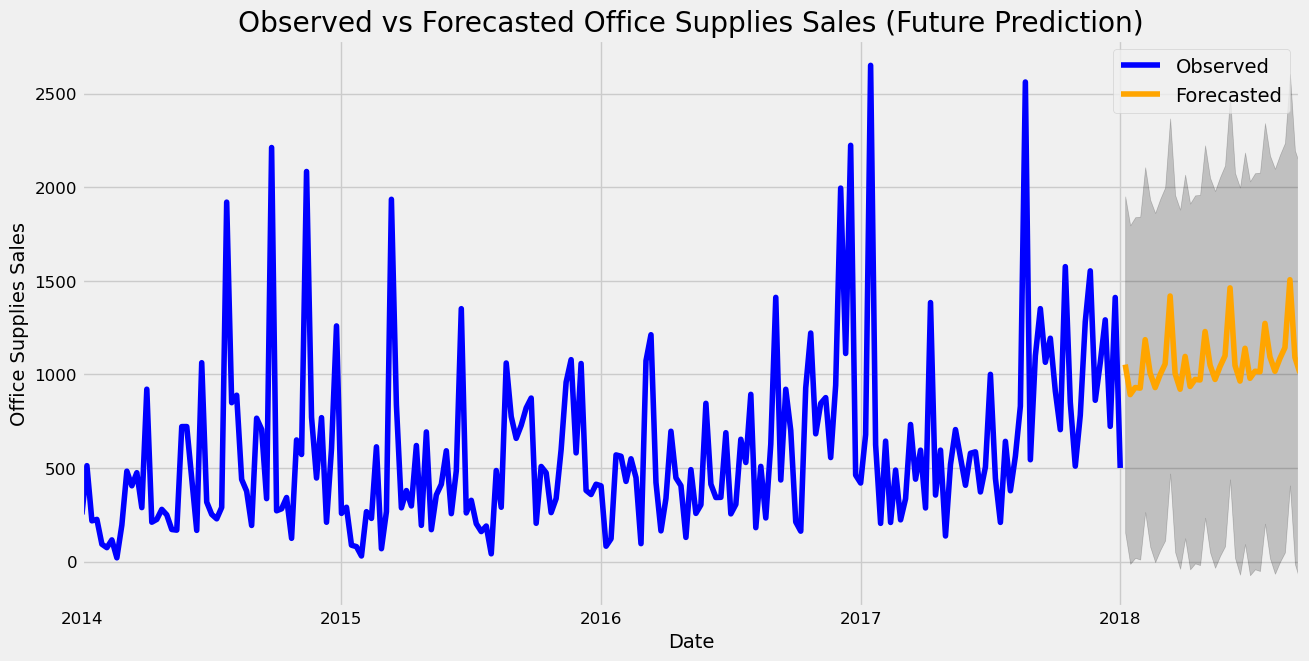

         Date     Forecast
0  2018-01-08  1052.497334
1  2018-01-15   892.201072
2  2018-01-22   929.889210
3  2018-01-29   926.868725
4  2018-02-05  1185.603951
5  2018-02-12  1006.606578
6  2018-02-19   929.777657
7  2018-02-26   998.689812
8  2018-03-05  1056.074255
9  2018-03-12  1418.844089
10 2018-03-19  1004.283815
11 2018-03-26   920.894186
12 2018-04-02  1095.989756
13 2018-04-09   935.693493
14 2018-04-16   973.381632
15 2018-04-23   970.361147
16 2018-04-30  1229.096373
17 2018-05-07  1050.099000
18 2018-05-14   973.270079
19 2018-05-21  1042.182234
20 2018-05-28  1099.566677
21 2018-06-04  1462.336511
22 2018-06-11  1047.776237
23 2018-06-18   964.386608
24 2018-06-25  1139.482178
25 2018-07-02   979.185915
26 2018-07-09  1016.874054
27 2018-07-16  1013.853569
28 2018-07-23  1272.588795
29 2018-07-30  1093.591422
30 2018-08-06  1016.762500
31 2018-08-13  1085.674656
32 2018-08-20  1143.059099
33 2018-08-27  1505.828933
34 2018-09-03  1091.268658
35 2018-09-10  1007.879030


In [323]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit the best ARIMA model on the entire Office Supplies dataset
mod = sm.tsa.statespace.SARIMAX(y_office_supplies,
                                order=best_param,
                                seasonal_order=best_seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(disp=False)

# Forecast future values
future_steps = 36  # Predict the next 36 weeks
future_forecast = results.get_forecast(steps=future_steps)

# Get the predicted mean and confidence intervals
future_pred = future_forecast.predicted_mean
future_ci = future_forecast.conf_int()

# Plot observed and forecasted values
plt.figure(figsize=(14, 7))

# Plot the historical data
ax = y_office_supplies.plot(label='Observed', color='blue')

# Plot the forecasted future values
future_pred.plot(ax=ax, label='Forecasted', color='orange')

# Fill the area between the confidence intervals
ax.fill_between(future_ci.index,
                future_ci.iloc[:, 0],
                future_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.title('Observed vs Forecasted Office Supplies Sales (Future Prediction)')
plt.show()

# Print the forecasted values
future_forecast_df = pd.DataFrame({'Date': future_pred.index, 'Forecast': future_pred.values})
print(future_forecast_df)


### Office Supplies - SARIMA Model

In [324]:
# Filter the data to select rows where the 'Category' column is 'Office Supplies'
office_supplies = df.loc[df['Category'] == 'Office Supplies']

# Convert the 'Order Date' column in the 'Office Supplies' DataFrame to datetime format
office_supplies['Order Date'] = pd.to_datetime(office_supplies['Order Date'])

# Define a list of column names to be dropped from the 'Office Supplies' DataFrame
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

# Drop the specified columns from the 'Office Supplies' DataFrame
office_supplies.drop(cols, axis=1, inplace=True)

# Sort the 'Office Supplies' DataFrame based on the 'Order Date' column
office_supplies = office_supplies.sort_values('Order Date')

# Check for missing values (null values) in the DataFrame and display the count of missing values per column
office_supplies.isnull().sum()

Order Date    0
Country       0
State         0
Sales         0
dtype: int64

In [327]:
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Resample the 'Sales' data for Office Supplies to weekly frequency
y_office_supplies = office_supplies['Sales'].resample('W-MON').mean()

# Train-Test Split (80/20)
train_size = int(len(y_office_supplies) * 0.8)
train, test = y_office_supplies[:train_size], y_office_supplies[train_size:]

# Define p, d, q for ARIMA model
p = d = q = range(0, 2)

# Generate all combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Generate all combinations of seasonal p, d, q with a seasonal period of 12 (for monthly seasonality)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Initialize variables to store the best model parameters for Office Supplies
best_aic_office = float('inf')
best_params_office = None
best_seasonal_params_office = None

# Find the best ARIMA model on the training data
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=False)
            if results.aic < best_aic_office:
                best_aic_office = results.aic
                best_params_office = param
                best_seasonal_params_office = param_seasonal
        except Exception as e:
            continue

print(f'Best SARIMA model for Office Supplies: ARIMA{best_params_office}x{best_seasonal_params_office}12 - AIC:{best_aic_office}')

# Save the best parameters
office_supplies_best_params = {
    'order': best_params_office,
    'seasonal_order': best_seasonal_params_office,
    'aic': best_aic_office
}

# Print saved parameters
print("Saved Best Parameters for Office Supplies:", office_supplies_best_params)


Best SARIMA model for Office Supplies: ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2138.134615791256
Saved Best Parameters for Office Supplies: {'order': (1, 1, 1), 'seasonal_order': (0, 1, 1, 12), 'aic': 2138.134615791256}


In [328]:
# Fit the best ARIMA model on the training data
mod = sm.tsa.statespace.SARIMAX(train,
                                order=best_param,
                                seasonal_order=best_seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(disp=False)

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9102      0.031    -29.092      0.000      -0.972      -0.849
ma.S.L12      -1.0020      0.086    -11.687      0.000      -1.170      -0.834
sigma2      2.062e+05   4.13e-07   4.99e+11      0.000    2.06e+05    2.06e+05


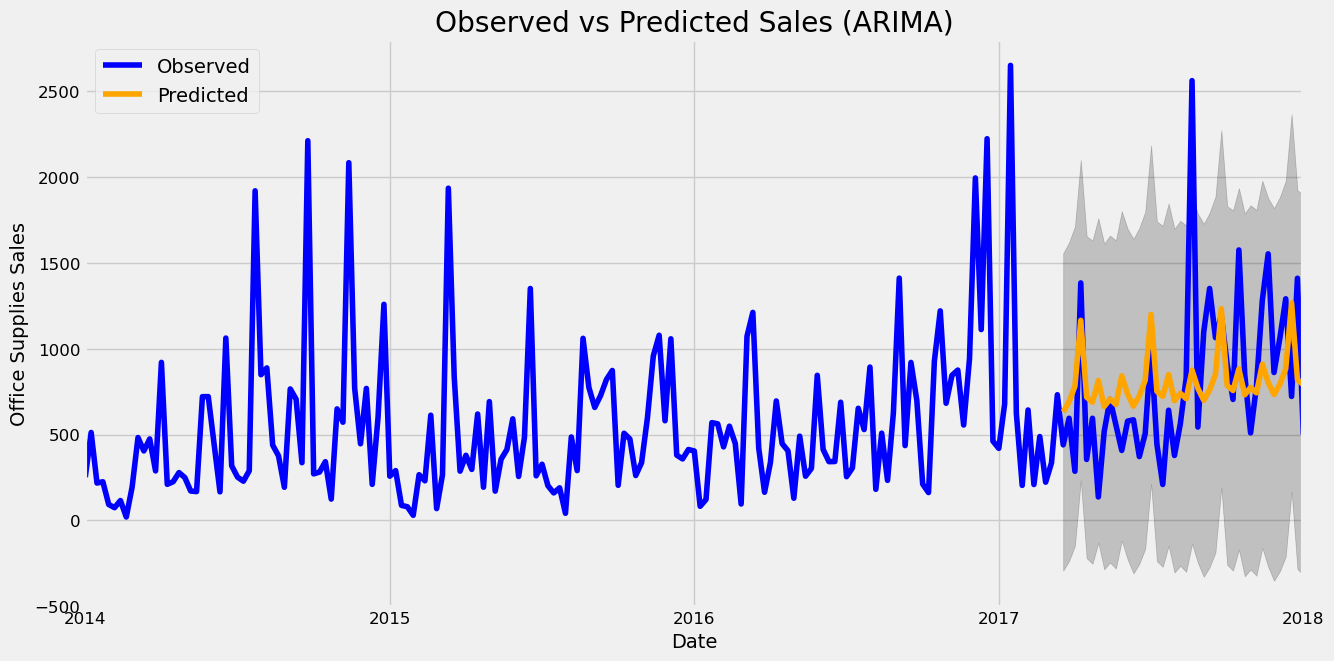

Test RMSE: 428.86


In [329]:
# Forecast
pred = results.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)
pred_ci = pred.conf_int()

# Plot observed vs predicted values
plt.figure(figsize=(14, 7))
ax = y.plot(label='Observed', color='blue')
pred.predicted_mean.plot(ax=ax, label='Predicted', color='orange')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.title('Observed vs Predicted Sales (ARIMA)')
plt.show()

# Calculate RMSE
y_forecasted = pred.predicted_mean
mse = mean_squared_error(test, y_forecasted)
print(f'Test RMSE: {round(np.sqrt(mse), 2)}')


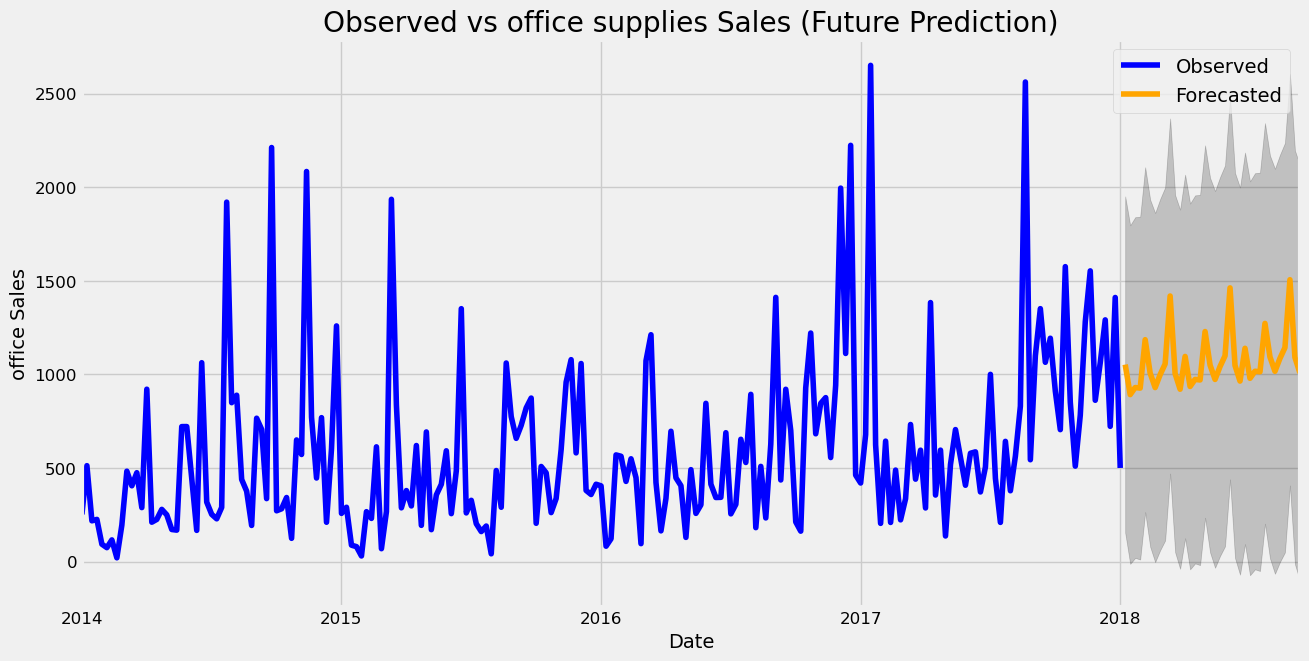

         Date     Forecast
0  2018-01-08  1052.497334
1  2018-01-15   892.201072
2  2018-01-22   929.889210
3  2018-01-29   926.868725
4  2018-02-05  1185.603951
5  2018-02-12  1006.606578
6  2018-02-19   929.777657
7  2018-02-26   998.689812
8  2018-03-05  1056.074255
9  2018-03-12  1418.844089
10 2018-03-19  1004.283815
11 2018-03-26   920.894186
12 2018-04-02  1095.989756
13 2018-04-09   935.693493
14 2018-04-16   973.381632
15 2018-04-23   970.361147
16 2018-04-30  1229.096373
17 2018-05-07  1050.099000
18 2018-05-14   973.270079
19 2018-05-21  1042.182234
20 2018-05-28  1099.566677
21 2018-06-04  1462.336511
22 2018-06-11  1047.776237
23 2018-06-18   964.386608
24 2018-06-25  1139.482178
25 2018-07-02   979.185915
26 2018-07-09  1016.874054
27 2018-07-16  1013.853569
28 2018-07-23  1272.588795
29 2018-07-30  1093.591422
30 2018-08-06  1016.762500
31 2018-08-13  1085.674656
32 2018-08-20  1143.059099
33 2018-08-27  1505.828933
34 2018-09-03  1091.268658
35 2018-09-10  1007.879030


In [330]:
# Fit the best ARIMA model on the entire dataset
mod = sm.tsa.statespace.SARIMAX(y,
                                order=best_param,
                                seasonal_order=best_seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(disp=False)

# Forecast future values
future_steps = 36  # Predict the next 36 weeks
future_forecast = results.get_forecast(steps=future_steps)

# Get the predicted mean and confidence intervals
future_pred = future_forecast.predicted_mean
future_ci = future_forecast.conf_int()

# Plot observed and forecasted values
plt.figure(figsize=(14, 7))

# Plot the historical data
ax = y.plot(label='Observed', color='blue')

# Plot the forecasted future values
future_pred.plot(ax=ax, label='Forecasted', color='orange')

# Fill the area between the confidence intervals
ax.fill_between(future_ci.index,
                future_ci.iloc[:, 0],
                future_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('office Sales')
plt.legend()
plt.title('Observed vs office supplies Sales (Future Prediction)')
plt.show()

# Print the forecasted values
future_forecast_df = pd.DataFrame({'Date': future_pred.index, 'Forecast': future_pred.values})
print(future_forecast_df)


### Office Supplies - Prophet Model

In [331]:
office_supplies = df.loc[df['Category'] == 'Office Supplies']
office_supplies = office_supplies.sort_values('Order Date')
office_supplies = office_supplies.groupby('Order Date')['Sales'].sum().reset_index()

# Convert the Order Date to datetime objects.
office_supplies['Order Date'] = pd.to_datetime(office_supplies['Order Date'])

# Set the Order Date column as the index
office_supplies = office_supplies.set_index('Order Date')

# Resample the Sales data to weekly
y_office_supplies = office_supplies['Sales'].resample('W-MON').mean()

# Create new DataFrame with Order Date and Sales for the resampled data.
office_supplies = pd.DataFrame({'Order Date': y_office_supplies.index, 'Sales': y_office_supplies.values})

19:49:35 - cmdstanpy - INFO - Chain [1] start processing
19:49:35 - cmdstanpy - INFO - Chain [1] done processing


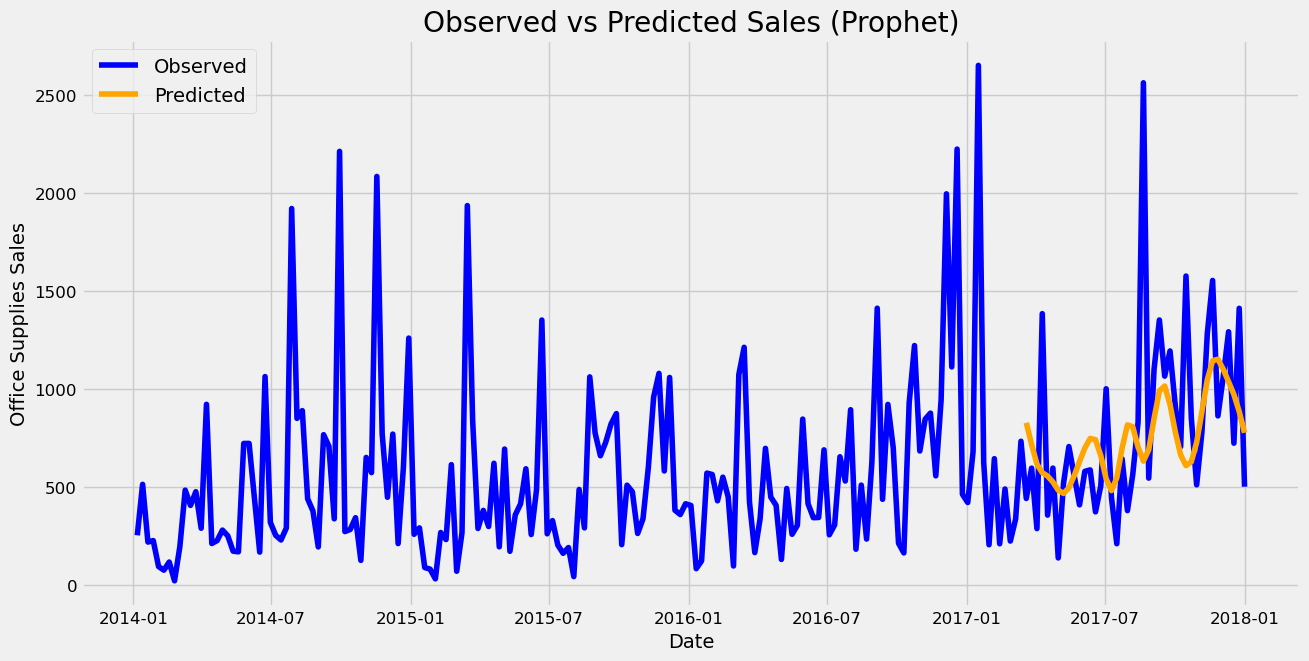

Test RMSE: 432.57


<Figure size 1400x700 with 0 Axes>

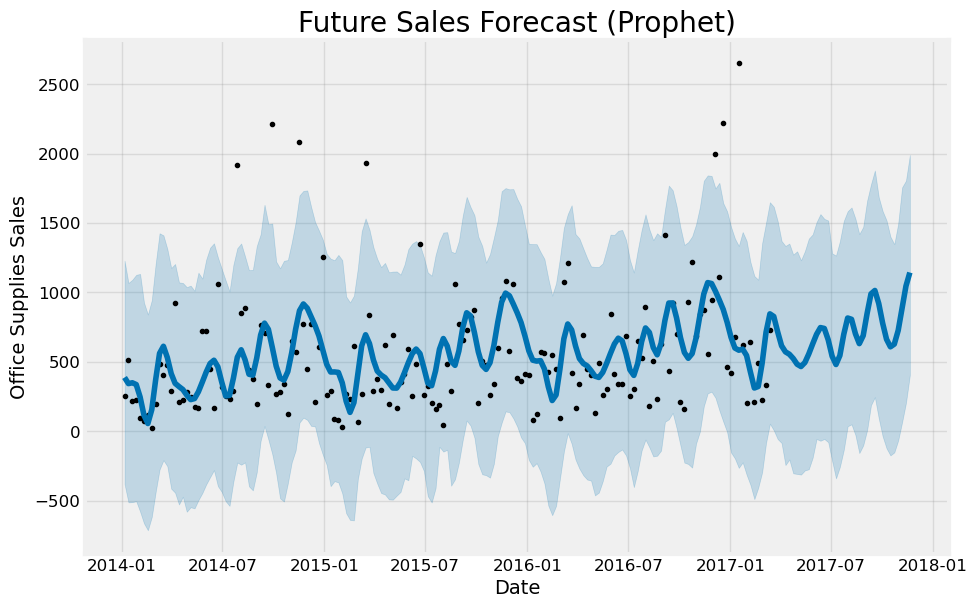

ds         yhat  yhat_lower   yhat_upper
167 2017-03-20   826.895444    6.619455  1617.451524
168 2017-03-27   715.931909  -56.623042  1513.688263
169 2017-04-03   615.751231  -84.853795  1371.193304
170 2017-04-10   571.836260 -243.982904  1334.984059
171 2017-04-17   554.865680 -204.002299  1352.338395
172 2017-04-24   524.030189 -303.525573  1272.734222
173 2017-05-01   482.564420 -308.023206  1296.359343
174 2017-05-08   466.028547 -312.644816  1231.686532
175 2017-05-15   494.840751 -282.608086  1297.561302
176 2017-05-22   556.499310 -274.341967  1387.507332
177 2017-05-29   628.760321 -190.766260  1418.216096
178 2017-06-05   698.145889  -56.056612  1506.570493
179 2017-06-12   746.774812  -68.882479  1564.694691
180 2017-06-19   740.508400  -56.184100  1530.358254
181 2017-06-26   658.592318  -79.120274  1518.039855
182 2017-07-03   540.647825 -212.349225  1281.684771
183 2017-07-10   480.440489 -340.158156  1265.594331
184 2017-07-17   545.366146 -257.057912  1368.678057
185 2017-07-24   697.975997 -134.985732  1514.778815
186 2017-07-31   815.860206   35.751304  1585.300734
187 2017-08-07   806.560160   49.055598  1612.315353
188 2017-08-14   702.344521  -27.894198  1531.490094
189 2017-08-21   630.918032 -157.681383  1420.431256
190 2017-08-28   688.784566 -102.074617  1472.017420
191 2017-09-04   848.280375    6.732811  1660.000677
192 2017-09-11   989.597227  187.254122  1779.027820
193 2017-09-18  1014.227594  245.270410  1878.806829
194 2017-09-25   920.248362   92.440973  1686.615518
195 2017-10-02   778.887088  -36.888162  1586.345386
196 2017-10-09   662.701841 -123.331442  1519.434747
197 2017-10-16   607.973342 -174.575874  1402.176003
198 2017-10-23   627.656136 -152.652458  1347.718203
199 2017-10-30   726.174763  -66.215342  1495.900057
200 2017-11-06   884.587395   64.436750  1756.831748
201 2017-11-13  1046.186246  204.076517  1805.906680
202 2017-11-20  1143.631546  404.362521  1989.990345

In [332]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for Prophet
office_supplies = office_supplies.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Split the data into 80% train and 20% test
train_size = int(len(office_supplies) * 0.8)
train = office_supplies[:train_size]
test = office_supplies[train_size:]

# Initialize and fit the Prophet model
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(train)

# Create a dataframe for future dates including the test period
future = prophet_model.make_future_dataframe(periods=len(test), freq='W-MON')

# Predict on the future dataframe
forecast = prophet_model.predict(future)

# Extract the predictions for the test set
test_forecast = forecast[-len(test):]

# Plot observed vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(office_supplies['ds'], office_supplies['y'], label='Observed', color='blue')
plt.plot(test['ds'], test_forecast['yhat'], label='Predicted', color='orange')
plt.xlabel('Date')
plt.ylabel('Office Supplies Sales')
plt.title('Observed vs Predicted Sales (Prophet)')
plt.legend()
plt.show()

# Calculate RMSE for the test set
rmse = np.sqrt(mean_squared_error(test['y'], test_forecast['yhat']))
print(f'Test RMSE: {rmse:.2f}')

# Future Forecast
# Predict the next 36 weeks
future_forecast_period = prophet_model.make_future_dataframe(periods=36, freq='W-MON')
future_forecast = prophet_model.predict(future_forecast_period)

# Plot the future forecast
plt.figure(figsize=(14, 7))
prophet_model.plot(future_forecast)
plt.xlabel('Date')
plt.ylabel('Office Supplies Sales')
plt.title('Future Sales Forecast (Prophet)')
plt.show()

# Display the future forecast
future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(36)


### Office Supplies - LSTM Model

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Prepare the data
office_supplies = office_supplies.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(office_supplies[['y']])

# Train-Test Split (80/20)
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Function to create dataset matrix for LSTM
def create_dataset(data, look_back=4):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 4  # Number of previous timesteps to use as input
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], look_back, 1))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

# Calculate RMSE for the test set
rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))
print(f'Test RMSE: {rmse:.2f}')

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0589
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0430 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0340 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0372 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0317 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0326 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0248 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0296 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0315 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0334 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0280 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0328
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0304 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0315 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━

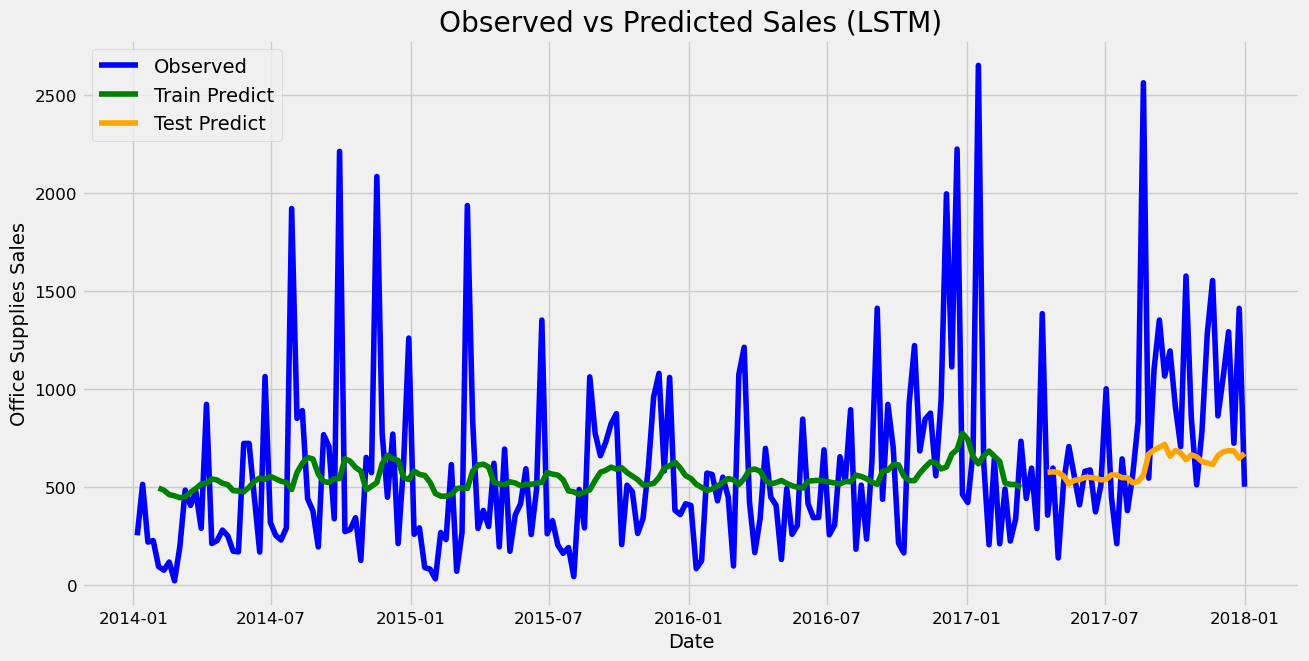

In [334]:
# Adjust indices for plotting
train_plot_start = look_back
train_plot_end = train_size

# Plot observed vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(office_supplies['ds'], scaler.inverse_transform(data_scaled), label='Observed', color='blue')

# Plot train predictions with correct indices
plt.plot(office_supplies['ds'][train_plot_start:train_plot_start + len(train_predict)], train_predict, label='Train Predict', color='green')

# Plot test predictions with correct indices
plt.plot(office_supplies['ds'][train_size + look_back:train_size + look_back + len(test_predict)], test_predict, label='Test Predict', color='orange')

plt.xlabel('Date')
plt.ylabel('Office Supplies Sales')
plt.title('Observed vs Predicted Sales (LSTM)')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

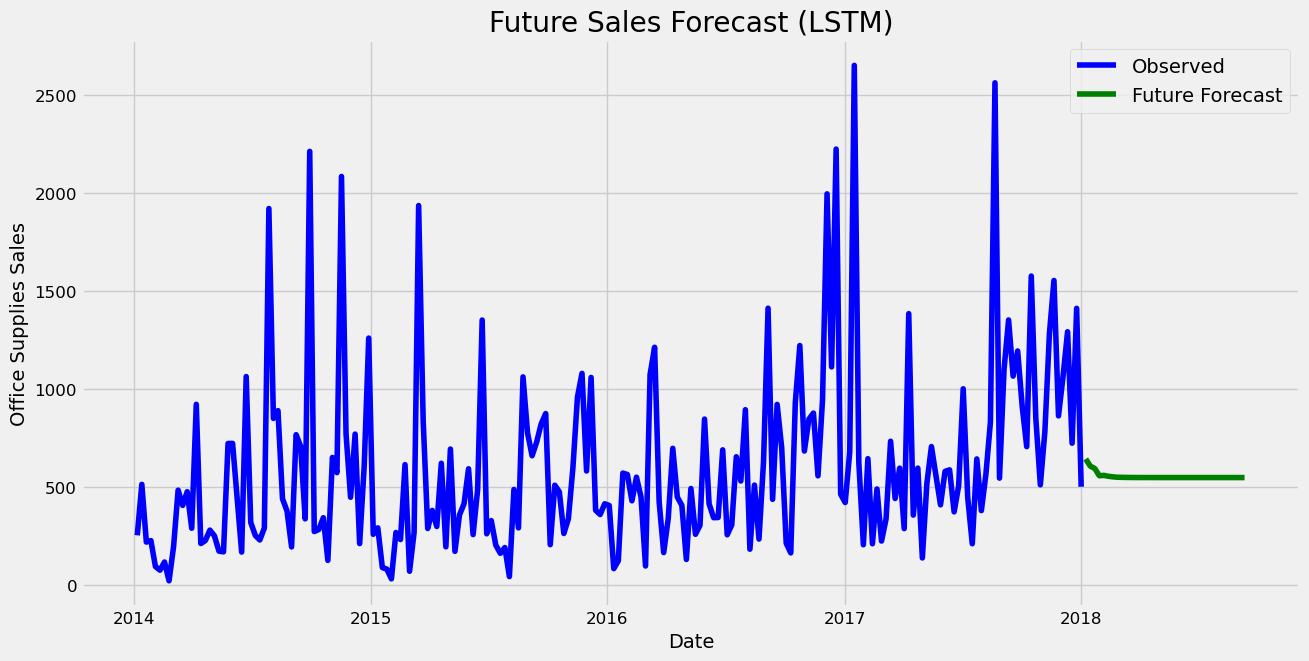

         Date    Forecast
0  2018-01-08  642.061951
1  2018-01-15  605.787537
2  2018-01-22  593.101746
3  2018-01-29  556.465881
4  2018-02-05  558.198730
5  2018-02-12  553.619812
6  2018-02-19  550.828491
7  2018-02-26  548.798889
8  2018-03-05  548.336914
9  2018-03-12  547.816162
10 2018-03-19  547.515930
11 2018-03-26  547.347290
12 2018-04-02  547.268799
13 2018-04-09  547.213013
14 2018-04-16  547.181763
15 2018-04-23  547.164368
16 2018-04-30  547.154663
17 2018-05-07  547.148682
18 2018-05-14  547.145325
19 2018-05-21  547.143555
20 2018-05-28  547.142334
21 2018-06-04  547.141724
22 2018-06-11  547.141357
23 2018-06-18  547.141174
24 2018-06-25  547.140991
25 2018-07-02  547.140930
26 2018-07-09  547.140930
27 2018-07-16  547.140869
28 2018-07-23  547.140808
29 2018-07-30  547.140808
30 2018-08-06  547.140808
31 2018-08-13  547.140808
32 2018-08-20  547.140869
33 2018-08-27  547.140869
34 2018-09-03  547.140808
35 2018-09-10  547.140869


In [335]:
# Future Forecast
future_steps = 36  # Number of future weeks to predict
future_input = test[-look_back:].reshape(1, look_back, 1)  # Use the last sequence from the test set
future_forecast = []

for _ in range(future_steps):
    # Predict the next value
    prediction = model.predict(future_input)
    future_forecast.append(prediction[0, 0])

    # Update the sequence by appending the prediction
    prediction_reshaped = np.reshape(prediction[0, 0], (1, 1, 1))  # Reshape prediction to (1, 1, 1)
    future_input = np.append(future_input[:, 1:, :], prediction_reshaped, axis=1)

# Inverse transform future forecast
future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Create future dates
last_date = office_supplies['ds'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps + 1, freq='W-MON')[1:]

# Plot future forecast
plt.figure(figsize=(14, 7))
plt.plot(office_supplies['ds'], scaler.inverse_transform(data_scaled), label='Observed', color='blue')
plt.plot(future_dates, future_forecast, label='Future Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Office Supplies Sales')
plt.title('Future Sales Forecast (LSTM)')
plt.legend()
plt.show()

# Print future forecast
future_forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast.flatten()})
print(future_forecast_df)


### Technology - SARIMA Model

In [336]:
# Filter the data to select rows where the 'Category' column is 'Technology'
technology = df.loc[df['Category'] == 'Technology']

# Convert the 'Order Date' column in the 'Technology' DataFrame to datetime format
technology['Order Date'] = pd.to_datetime(technology['Order Date'])

# Define a list of column names to be dropped from the 'Technology' DataFrame
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City',  'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

# Drop the specified columns from the 'Technology' DataFrame
technology.drop(cols, axis=1, inplace=True)

# Sort the 'Technology' DataFrame based on the 'Order Date' column
technology = technology.sort_values('Order Date')

# Check for missing values (null values) in the DataFrame and display the count of missing values per column
technology.isnull().sum()

Order Date    0
Country       0
State         0
Sales         0
dtype: int64

In [337]:
# Group the 'Technology' DataFrame by 'Order Date' and calculate the sum of 'Sales' for each date
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()

# Set the 'Order Date' column as the index of the 'Technology' DataFrame
technology = technology.set_index('Order Date')

# Convert the index to datetime if it's not already
technology.index = pd.to_datetime(technology.index)

# Resample by month start ('MS-MON') and calculate the mean
y = technology['Sales'].resample('W-MON').mean()

In [340]:
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Resample the 'Sales' data for Technology to weekly ('W-MON') frequency
y_technology = technology['Sales'].resample('W-MON').mean()

# Train-Test Split (80/20)
train_size = int(len(y_technology) * 0.8)
train, test = y_technology[:train_size], y_technology[train_size:]

# Define p, d, q parameters for ARIMA model
p = d = q = range(0, 2)

# Generate all combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Generate all combinations of seasonal p, d, q with a seasonal period of 12 (for monthly seasonality)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Initialize variables to store the best model parameters for Technology
best_aic_tech = float('inf')
best_params_tech = None
best_seasonal_params_tech = None

# Find the best ARIMA model on the training data
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=False)
            if results.aic < best_aic_tech:
                best_aic_tech = results.aic
                best_params_tech = param
                best_seasonal_params_tech = param_seasonal
        except Exception as e:
            continue

print(f'Best SARIMA model for Technology: ARIMA{best_params_tech}x{best_seasonal_params_tech}12 - AIC:{best_aic_tech}')

# Save the best parameters
technology_best_params = {
    'order': best_params_tech,
    'seasonal_order': best_seasonal_params_tech,
    'aic': best_aic_tech
}

# Print saved parameters
print("Saved Best Parameters for Technology:", technology_best_params)


Best SARIMA model for Technology: ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2262.888445768788
Saved Best Parameters for Technology: {'order': (0, 1, 1), 'seasonal_order': (0, 1, 1, 12), 'aic': 2262.888445768788}


In [341]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(disp = False)
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0098      0.074      0.133      0.894      -0.135       0.155
ma.L1         -1.0000      0.085    -11.823      0.000      -1.166      -0.834
ar.S.L12      -0.4373      0.047     -9.212      0.000      -0.530      -0.344
sigma2      8.883e+05   9.52e-08   9.33e+12      0.000    8.88e+05    8.88e+05


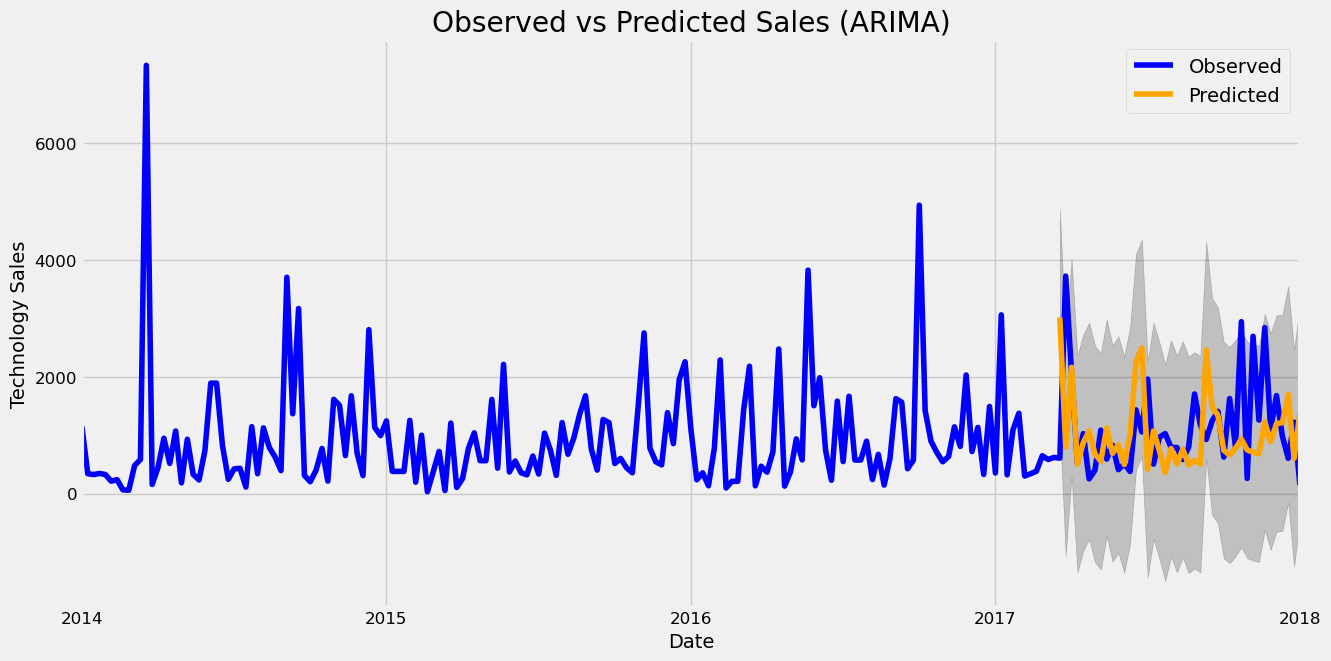

Test RMSE: 1003.17


In [342]:
# Forecast
pred = results.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)
pred_ci = pred.conf_int()

# Plot observed vs predicted values
plt.figure(figsize=(14, 7))
ax = y.plot(label='Observed', color='blue')
pred.predicted_mean.plot(ax=ax, label='Predicted', color='orange')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.title('Observed vs Predicted Sales (ARIMA)')
plt.show()

# Calculate RMSE for the test set
y_forecasted = pred.predicted_mean
mse = mean_squared_error(test, y_forecasted)
rmse = np.sqrt(mse)
print(f'Test RMSE: {round(rmse, 2)}')


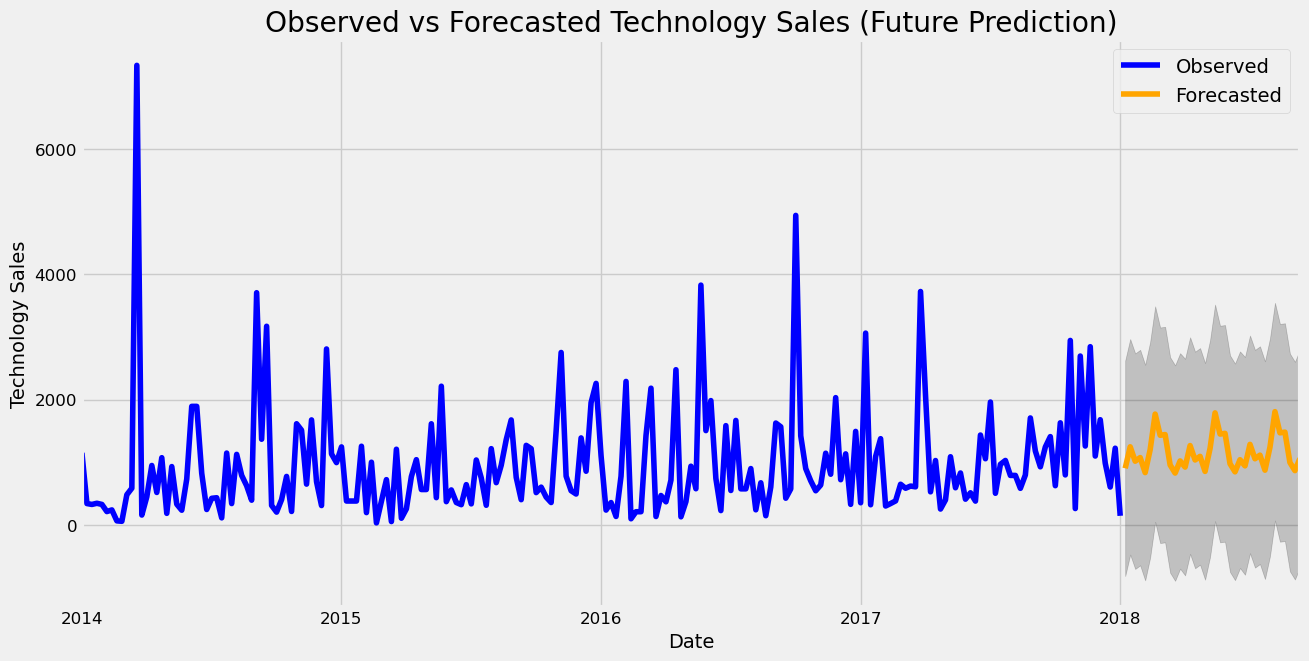

         Date     Forecast
0  2018-01-08   901.381110
1  2018-01-15  1244.770062
2  2018-01-22  1015.188505
3  2018-01-29  1072.627790
4  2018-02-05   832.814145
5  2018-02-12  1199.220174
6  2018-02-19  1767.307318
7  2018-02-26  1428.980591
8  2018-03-05  1440.049461
9  2018-03-12   955.069731
10 2018-03-19   825.489617
11 2018-03-26  1019.302966
12 2018-04-02   920.790226
13 2018-04-09  1264.179178
14 2018-04-16  1034.597621
15 2018-04-23  1092.036906
16 2018-04-30   852.223261
17 2018-05-07  1218.629290
18 2018-05-14  1786.716434
19 2018-05-21  1448.389707
20 2018-05-28  1459.458577
21 2018-06-04   974.478847
22 2018-06-11   844.898733
23 2018-06-18  1038.712082
24 2018-06-25   940.199342
25 2018-07-02  1283.588294
26 2018-07-09  1054.006736
27 2018-07-16  1111.446022
28 2018-07-23   871.632377
29 2018-07-30  1238.038406
30 2018-08-06  1806.125550
31 2018-08-13  1467.798823
32 2018-08-20  1478.867693
33 2018-08-27   993.887963
34 2018-09-03   864.307849
35 2018-09-10  1058.121197


In [343]:
# Fit the best ARIMA model on the entire dataset
mod = sm.tsa.statespace.SARIMAX(y,
                                order=best_param,
                                seasonal_order=best_seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(disp=False)

# Forecast future values
future_steps = 36  # Predict the next 36 weeks
future_forecast = results.get_forecast(steps=future_steps)

# Get the predicted mean and confidence intervals
future_pred = future_forecast.predicted_mean
future_ci = future_forecast.conf_int()

# Plot observed and forecasted values
plt.figure(figsize=(14, 7))

# Plot the historical data
ax = y.plot(label='Observed', color='blue')

# Plot the forecasted future values
future_pred.plot(ax=ax, label='Forecasted', color='orange')

# Fill the area between the confidence intervals
ax.fill_between(future_ci.index,
                future_ci.iloc[:, 0],
                future_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.title('Observed vs Forecasted Technology Sales (Future Prediction)')
plt.show()

# Print the forecasted values
future_forecast_df = pd.DataFrame({'Date': future_pred.index, 'Forecast': future_pred.values})
print(future_forecast_df)


### Technology - Prophet Model

In [344]:
technology = df.loc[df['Category'] == 'Technology']
technology = technology.sort_values('Order Date')
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()

# Convert the Order Date to datetime objects
technology['Order Date'] = pd.to_datetime(technology['Order Date'])

# Set the Order Date column
technology = technology.set_index('Order Date')

# Resample the Sales data to weekly
y_technology = technology['Sales'].resample('W-MON').mean()

# Create new DataFrame with 'Order Date' and 'Sales' for the resampled data.
technology = pd.DataFrame({'Order Date': y_technology.index, 'Sales': y_technology.values})

19:49:54 - cmdstanpy - INFO - Chain [1] start processing
19:49:54 - cmdstanpy - INFO - Chain [1] done processing


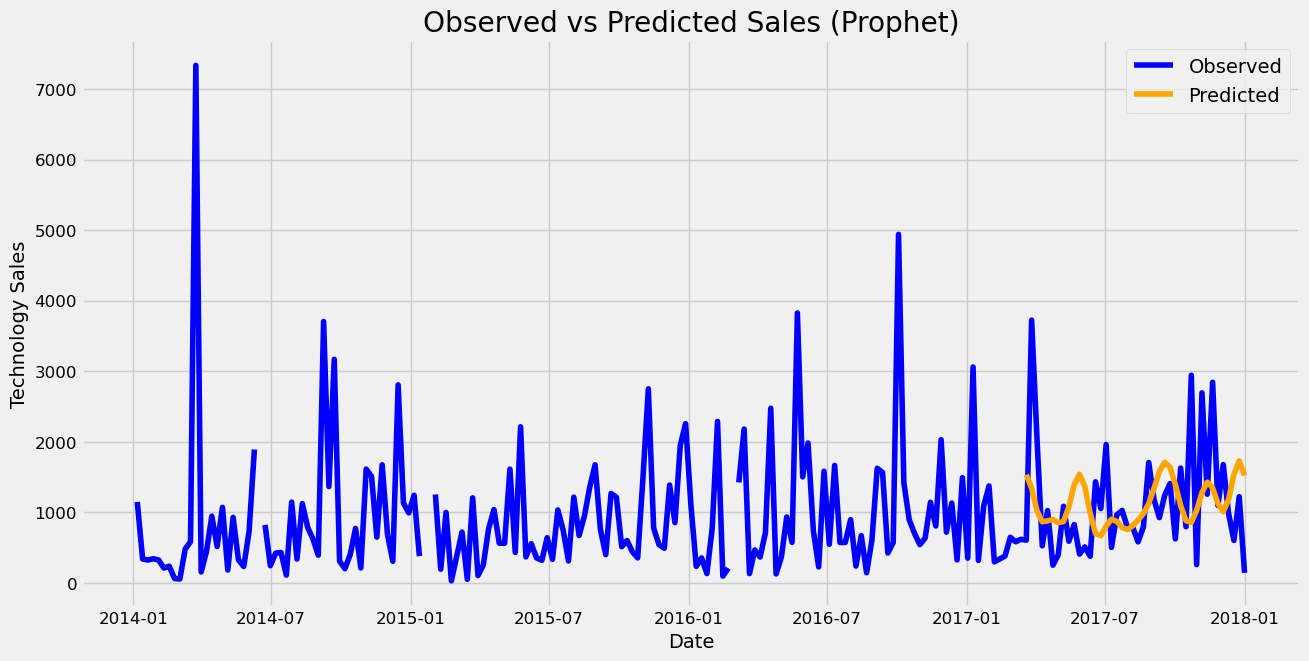

Test RMSE: 822.67


<Figure size 1400x700 with 0 Axes>

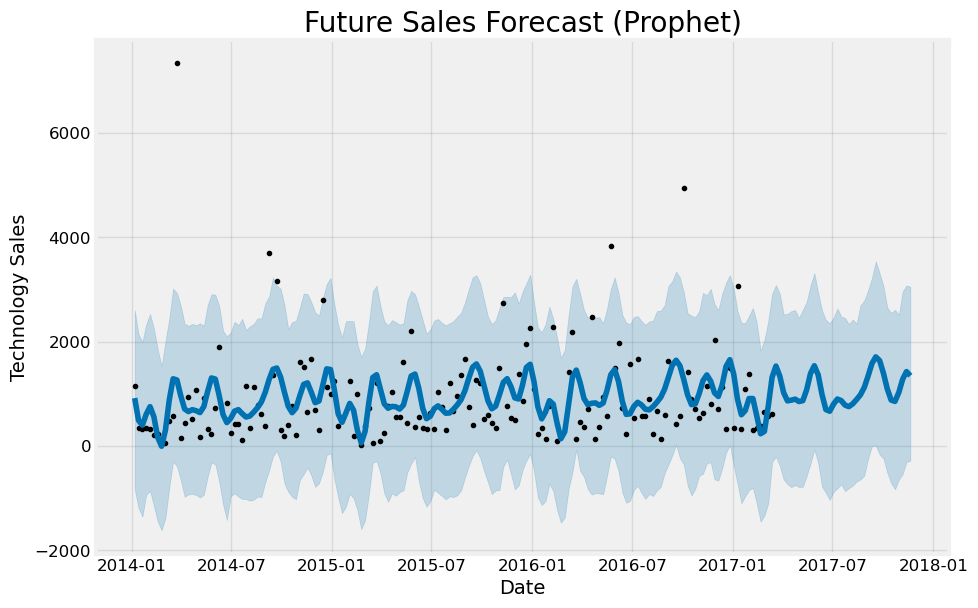

            ds         yhat   yhat_lower   yhat_upper
167 2017-03-20  1533.391367  -204.979457  3085.853397
168 2017-03-27  1341.892192  -377.931920  2920.581504
169 2017-04-03  1025.455287  -637.771876  2525.106357
170 2017-04-10   866.542163  -729.354408  2531.944353
171 2017-04-17   880.174429  -787.257584  2587.192983
172 2017-04-24   899.507116  -747.772692  2606.962873
173 2017-05-01   854.117081  -784.093305  2453.767098
174 2017-05-08   870.588891  -779.929394  2610.280175
175 2017-05-15  1079.328177  -572.809258  2764.788591
176 2017-05-22  1390.748762  -335.809067  3076.792965
177 2017-05-29  1540.181413   -66.902433  3315.318218
178 2017-06-05  1364.636772  -325.214387  2938.015843
179 2017-06-12   988.214001  -779.298193  2599.815754
180 2017-06-19   700.236326  -896.825809  2417.234608
181 2017-06-26   668.150645 -1029.844391  2352.819846
182 2017-07-03   803.472605  -876.193005  2462.064491
183 2017-07-10   902.415964  -810.422391  2636.254754
184 2017-07-17   871.066327 

In [345]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for Prophet
technology = y_technology.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Split the data into 80% train and 20% test
train_size = int(len(technology) * 0.8)
train = technology[:train_size]
test = technology[train_size:]

# Initialize and fit the Prophet model
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(train)

# Create a dataframe for future dates including the test period
future = prophet_model.make_future_dataframe(periods=len(test), freq='W-MON')

# Predict on the future dataframe
forecast = prophet_model.predict(future)

# Extract the predictions for the test set
test_forecast = forecast[-len(test):]

# Plot observed vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(technology['ds'], technology['y'], label='Observed', color='blue')
plt.plot(test['ds'], test_forecast['yhat'], label='Predicted', color='orange')
plt.xlabel('Date')
plt.ylabel('Technology Sales')
plt.title('Observed vs Predicted Sales (Prophet)')
plt.legend()
plt.show()

# Calculate RMSE for the test set
rmse = np.sqrt(mean_squared_error(test['y'], test_forecast['yhat']))
print(f'Test RMSE: {rmse:.2f}')

# Future Forecast
# Predict the next 36 weeks
future_forecast_period = prophet_model.make_future_dataframe(periods=36, freq='W-MON')
future_forecast = prophet_model.predict(future_forecast_period)

# Plot the future forecast
plt.figure(figsize=(14, 7))
prophet_model.plot(future_forecast)
plt.xlabel('Date')
plt.ylabel('Technology Sales')
plt.title('Future Sales Forecast (Prophet)')
plt.show()

# Display the future forecast
future_forecast_df = future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(36)
print(future_forecast_df)


### Technology - LSTM Model

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

technology = df.loc[df['Category'] == 'Technology']
technology = technology.sort_values('Order Date')
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
technology['Order Date'] = pd.to_datetime(technology['Order Date'])

# Set the Order Date column as index
technology = technology.set_index('Order Date')

# Resample the Sales data to weekly
y_technology = technology['Sales'].resample('W-MON').mean()

# Check for and handle NaN values
y_technology = y_technology.fillna(0)  # Fill NaN with 0, or use another strategy as appropriate

# Create new DataFrame with 'Order Date' and 'Sales' for the resampled data.
technology = pd.DataFrame({'Order Date': y_technology.index, 'Sales': y_technology.values})
technology = technology.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(technology[['y']])

# Train-Test Split (80/20)
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Function to create dataset matrix for LSTM
def create_dataset(data, look_back=4):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 4  # Number of previous timesteps to use as input
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], look_back, 1))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

# Calculate RMSE for the test set
rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))
print(f'Test RMSE: {rmse:.2f}')

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0313
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0217 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0201 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0159 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0140 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0197 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0180 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0146 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0162 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0142 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0165 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━

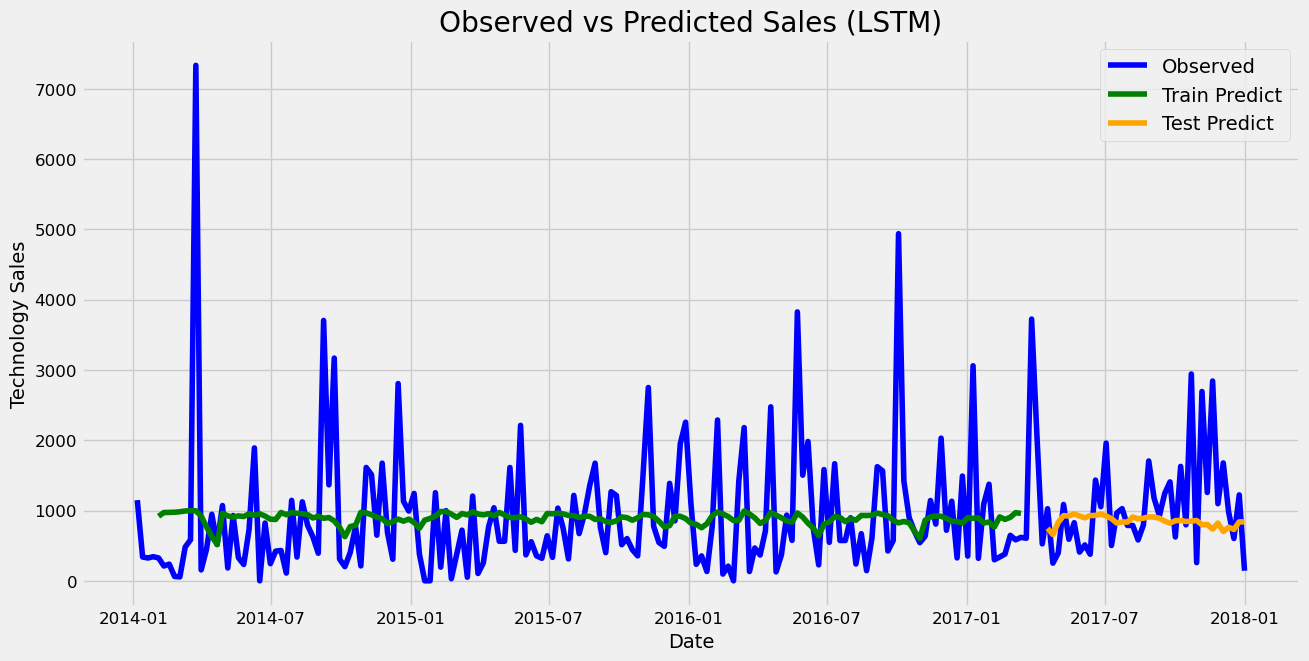

In [347]:
# Adjust indices for plotting
train_plot_start = look_back
train_plot_end = train_size

# Plot observed vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(technology['ds'], scaler.inverse_transform(data_scaled), label='Observed', color='blue')

# Plot train predictions with correct indices
plt.plot(technology['ds'][train_plot_start:train_plot_start + len(train_predict)], train_predict, label='Train Predict', color='green')

# Plot test predictions with correct indices
plt.plot(technology['ds'][train_size + look_back:train_size + look_back + len(test_predict)], test_predict, label='Test Predict', color='orange')

plt.xlabel('Date')
plt.ylabel('Technology Sales')
plt.title('Observed vs Predicted Sales (LSTM)')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

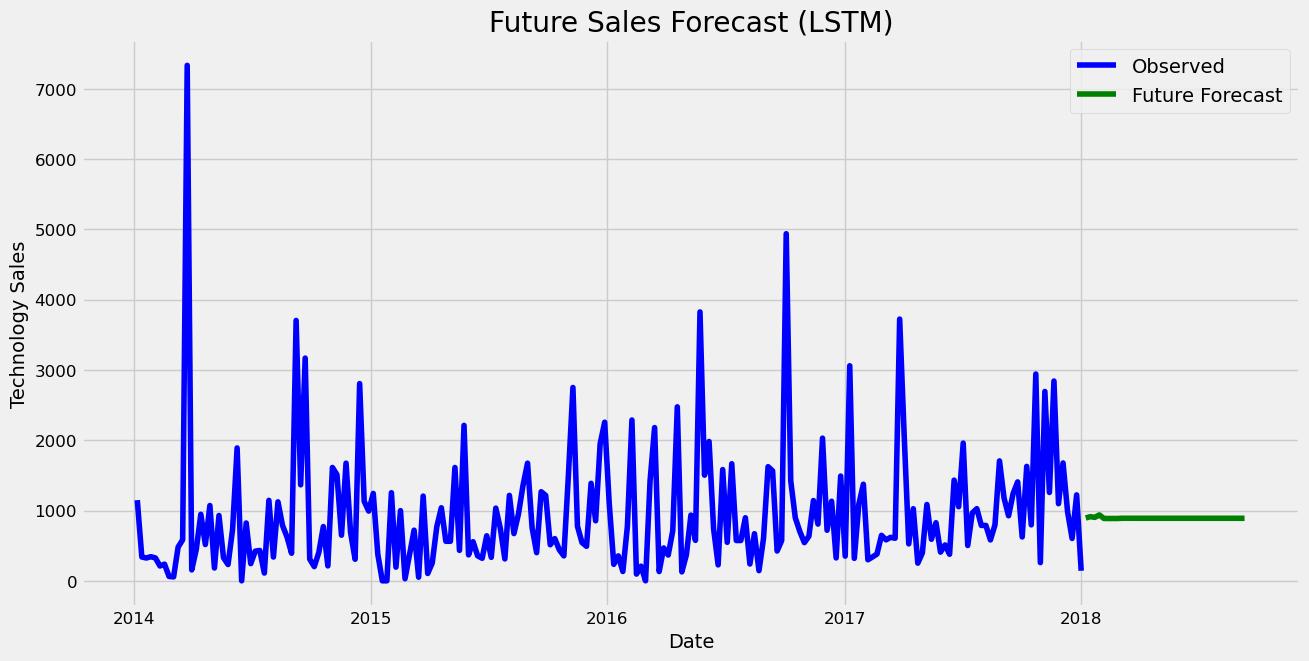

         Date    Forecast
0  2018-01-08  894.186584
1  2018-01-15  912.574951
2  2018-01-22  902.837158
3  2018-01-29  937.807800
4  2018-02-05  887.629395
5  2018-02-12  886.351929
6  2018-02-19  886.677246
7  2018-02-26  886.782776
8  2018-03-05  890.125671
9  2018-03-12  890.165161
10 2018-03-19  890.049988
11 2018-03-26  889.885132
12 2018-04-02  889.668335
13 2018-04-09  889.677124
14 2018-04-16  889.698242
15 2018-04-23  889.718994
16 2018-04-30  889.732056
17 2018-05-07  889.729858
18 2018-05-14  889.727173
19 2018-05-21  889.725220
20 2018-05-28  889.724304
21 2018-06-04  889.724854
22 2018-06-11  889.725098
23 2018-06-18  889.725159
24 2018-06-25  889.725281
25 2018-07-02  889.725159
26 2018-07-09  889.725159
27 2018-07-16  889.725159
28 2018-07-23  889.725159
29 2018-07-30  889.725159
30 2018-08-06  889.725159
31 2018-08-13  889.725159
32 2018-08-20  889.725159
33 2018-08-27  889.725159
34 2018-09-03  889.725159
35 2018-09-10  889.725159


In [348]:
# Future Forecast
future_steps = 36  # Number of future weeks to predict
future_input = test[-look_back:].reshape(1, look_back, 1)  # Use the last sequence from the test set
future_forecast = []

for _ in range(future_steps):
    # Predict the next value
    prediction = model.predict(future_input)
    future_forecast.append(prediction[0, 0])

    # Update the sequence by appending the prediction
    prediction_reshaped = np.reshape(prediction[0, 0], (1, 1, 1))  # Reshape prediction to (1, 1, 1)
    future_input = np.append(future_input[:, 1:, :], prediction_reshaped, axis=1)

# Inverse transform future forecast
future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Create future dates
last_date = technology['ds'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps + 1, freq='W-MON')[1:]

# Plot future forecast
plt.figure(figsize=(14, 7))
plt.plot(technology['ds'], scaler.inverse_transform(data_scaled), label='Observed', color='blue')
plt.plot(future_dates, future_forecast, label='Future Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Technology Sales')
plt.title('Future Sales Forecast (LSTM)')
plt.legend()
plt.show()

# Print future forecast
future_forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast.flatten()})
print(future_forecast_df)


## Modelling all 3 categories together

In [349]:
# Create a new DataFrame for furniture sales.
# 'Order Date' is populated with the index from the y_furniture Series which presumably contains the dates.
# 'Sales' is populated with the corresponding sales values from the y_furniture Series.
furniture = pd.DataFrame({'Order Date': y_furniture.index, 'Sales': y_furniture.values})

# Create a new DataFrame for office supplies sales.
office_supplies = pd.DataFrame({'Order Date': y_office_supplies.index, 'Sales': y_office_supplies.values})

# Create a new DataFrame for technology sales.
technology = pd.DataFrame({'Order Date': y_technology.index, 'Sales': y_technology.values})

In [350]:
# Merge the 'furniture' DataFrame with the 'office_supplies' DataFrame using an inner join.
# This will combine the data on rows where the 'Order Date' matches in both DataFrames.
# The resulting DataFrame will only contain rows that have an 'Order Date' present in both 'furniture' and 'office_supplies'.
store = furniture.merge(office_supplies, how='inner', on='Order Date')
store = store.merge(technology, how='inner', on='Order Date')


In [351]:
# Rename the columns in the 'store' DataFrame for clarity:
# 'Sales_x' is renamed to 'furniture_sales' to indicate sales data for furniture,
# 'Sales_y' is renamed to 'office_sales' to indicate sales data for office supplies,
# 'Sales' is renamed to 'technology_sales' to indicate sales data for technology.
# The 'inplace=True' argument applies these changes directly to the 'store' DataFrame.
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales', 
                      'Sales': 'technology_sales'}, inplace=True)

# Display the first five rows of the 'store' DataFrame to check the data and the new column names.
store.head()

Order Date  furniture_sales  office_sales  technology_sales
0 2014-01-06       2573.82000      252.3460       1147.940000
1 2014-01-13        254.63675      512.4450        338.970000
2 2014-01-20        446.01100      217.7695        324.693333
3 2014-01-27        191.81600      225.4700        343.330000
4 2014-02-03        290.66600       93.0565        324.930000

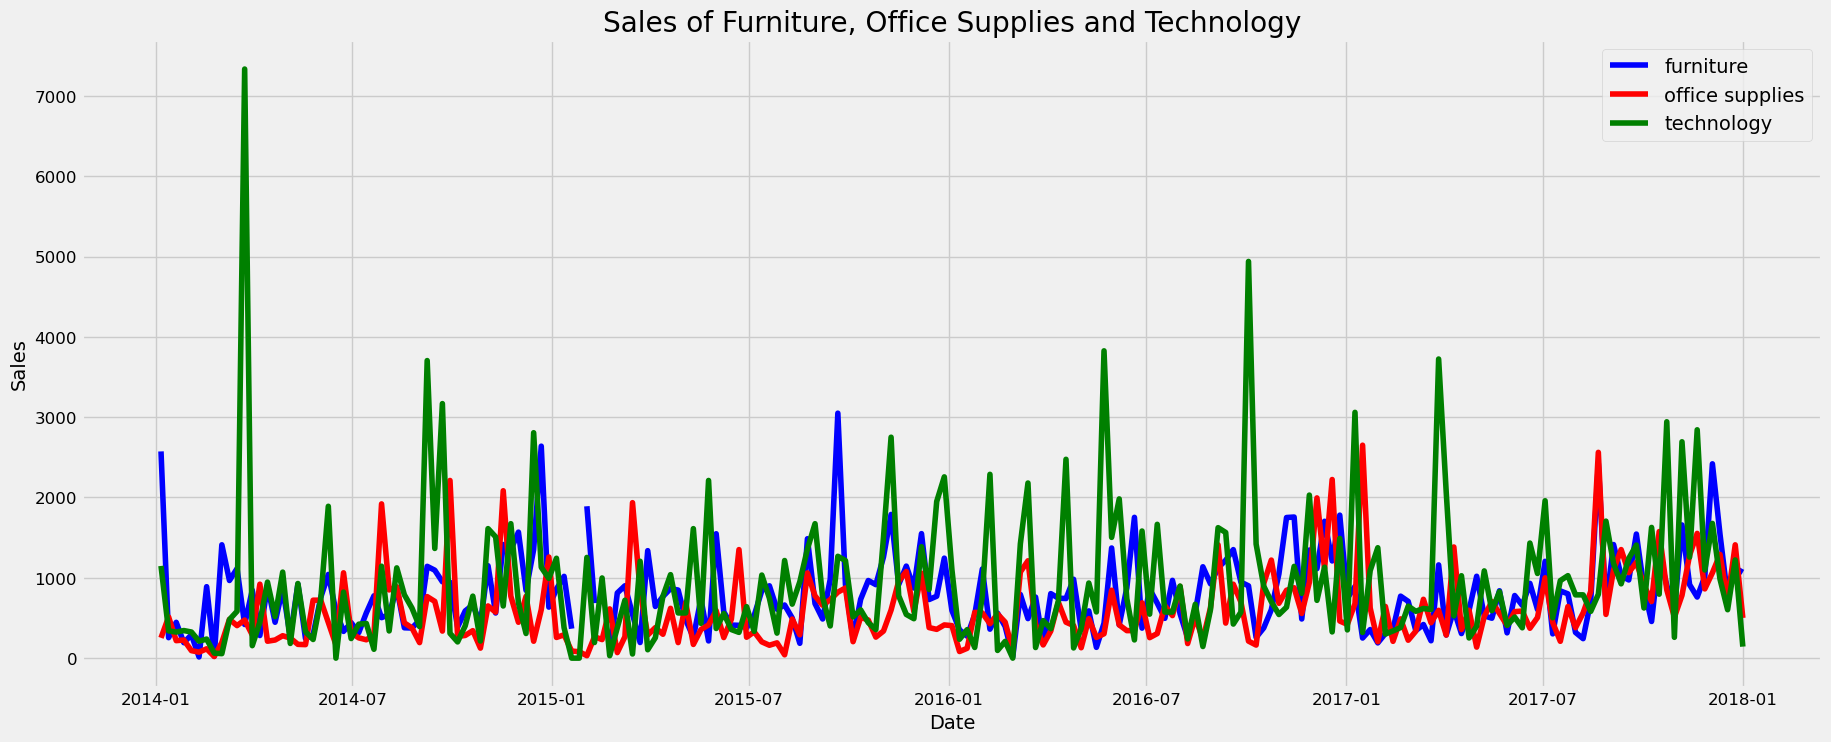

In [352]:
# Set up the matplotlib figure with a specified size of 20x8 inches.
plt.figure(figsize=(20, 8))

# Plot the furniture sales data as a blue line with 'b-' as the line style and label it as 'furniture'.
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')

# Plot the office supplies sales data as a red line with 'r-' as the line style and label it as 'office supplies'.
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')

# Plot the technology sales data as a green line with 'g-' as the line style and label it as 'technology'.
plt.plot(store['Order Date'], store['technology_sales'], 'g-', label = 'technology')

# Label the x-axis as 'Date' and the y-axis as 'Sales'.
plt.xlabel('Date'); plt.ylabel('Sales')

# Add a title to the plot: 'Sales of Furniture, Office Supplies and Technology'.
plt.title('Sales of Furniture, Office Supplies and Technology')

# Display the legend to differentiate between the data series.
plt.legend()

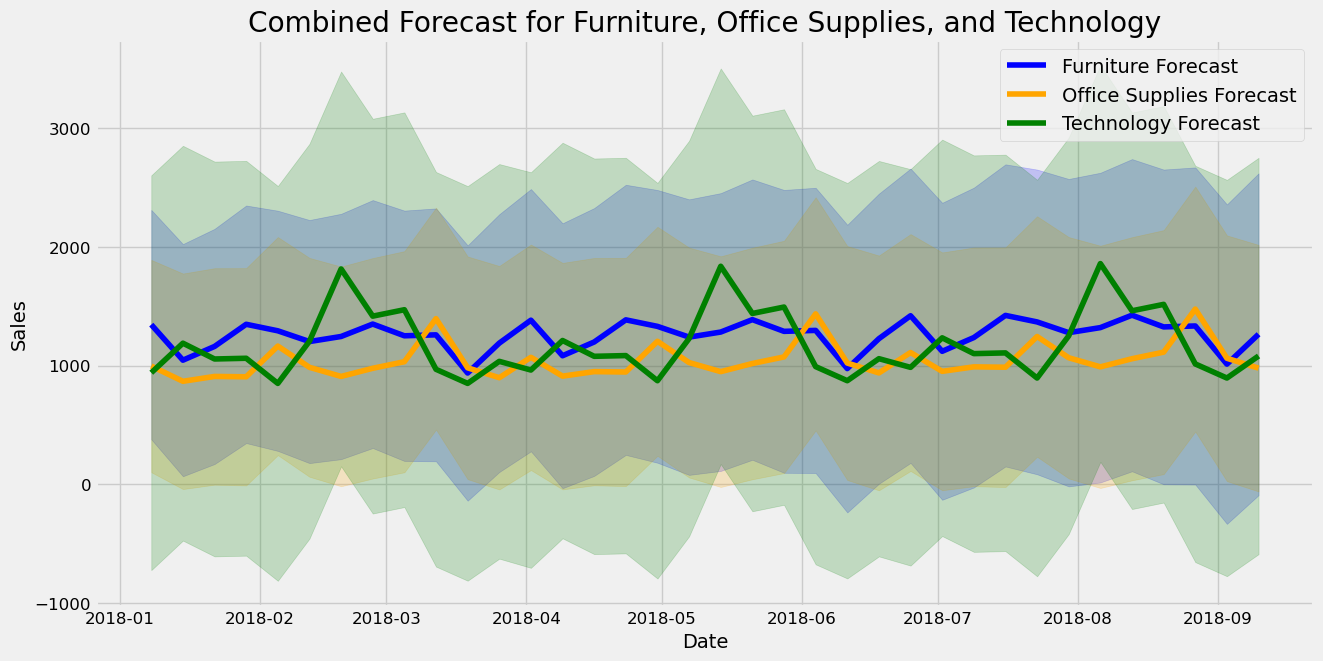

In [355]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Furniture Model and Forecast
furniture_mod = sm.tsa.statespace.SARIMAX(y_furniture,
                                          order=best_params_furniture,
                                          seasonal_order=best_seasonal_params_furniture,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
furniture_results = furniture_mod.fit(disp=False)
furniture_forecast = furniture_results.get_forecast(steps=36).summary_frame()
furniture_forecast.columns = ['furniture_' + col for col in furniture_forecast.columns]

# Office Supplies Model and Forecast
office_mod = sm.tsa.statespace.SARIMAX(y_office_supplies,
                                       order=best_params_office,
                                       seasonal_order=best_seasonal_params_office,
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
office_results = office_mod.fit(disp=False)
office_supplies_forecast = office_results.get_forecast(steps=36).summary_frame()
office_supplies_forecast.columns = ['office_' + col for col in office_supplies_forecast.columns]

# Technology Model and Forecast
technology_mod = sm.tsa.statespace.SARIMAX(y_technology,
                                           order=best_params_tech,
                                           seasonal_order=best_seasonal_params_tech,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
technology_results = technology_mod.fit(disp=False)
technology_forecast = technology_results.get_forecast(steps=36).summary_frame()
technology_forecast.columns = ['technology_' + col for col in technology_forecast.columns]

# Combine the forecasts into a single DataFrame
combined_forecast = pd.concat([furniture_forecast, office_supplies_forecast, technology_forecast], axis=1)

# Plotting
plt.figure(figsize=(14, 7))

plt.plot(furniture_forecast.index, furniture_forecast['furniture_mean'], label='Furniture Forecast', color='blue')
plt.plot(office_supplies_forecast.index, office_supplies_forecast['office_mean'], label='Office Supplies Forecast', color='orange')
plt.plot(technology_forecast.index, technology_forecast['technology_mean'], label='Technology Forecast', color='green')

# Confidence intervals
plt.fill_between(furniture_forecast.index, 
                 furniture_forecast['furniture_mean_ci_lower'], 
                 furniture_forecast['furniture_mean_ci_upper'], 
                 color='blue', alpha=0.2)

plt.fill_between(office_supplies_forecast.index, 
                 office_supplies_forecast['office_mean_ci_lower'], 
                 office_supplies_forecast['office_mean_ci_upper'], 
                 color='orange', alpha=0.2)

plt.fill_between(technology_forecast.index, 
                 technology_forecast['technology_mean_ci_lower'], 
                 technology_forecast['technology_mean_ci_upper'], 
                 color='green', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Combined Forecast for Furniture, Office Supplies, and Technology')
plt.legend()
plt.show()

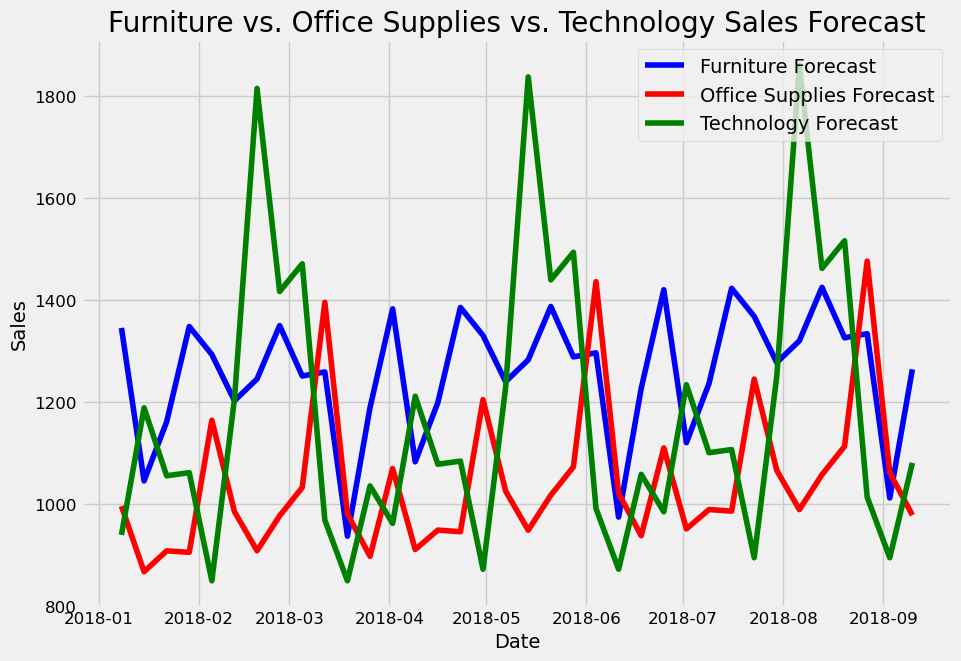

In [358]:
# Initialize a new figure for plotting with a size of 10 inches wide by 7 inches tall.
plt.figure(figsize=(10, 7))

# Plot the forecasted sales for Furniture as a blue line.
plt.plot(combined_forecast.index, combined_forecast['furniture_mean'], 'b-', label='Furniture Forecast')

# Plot the forecasted sales for Office Supplies as a red line.
plt.plot(combined_forecast.index, combined_forecast['office_mean'], 'r-', label='Office Supplies Forecast')

# Plot the forecasted sales for Technology as a green line.
plt.plot(combined_forecast.index, combined_forecast['technology_mean'], 'g-', label='Technology Forecast')

# Display the legend to identify each line with its corresponding label.
plt.legend()

# Label the x-axis as 'Date' and the y-axis as 'Sales'.
plt.xlabel('Date')
plt.ylabel('Sales')

# Set the title of the graph to 'Furniture vs. Office Supplies vs. Technology Sales Forecast'.
plt.title('Furniture vs. Office Supplies vs. Technology Sales Forecast')

# Display the plot.
plt.show()
